## Business case:
### Bank GoodCredit want to predict the credit score for based on current credit score of customers and the cred score will denote a customer’s credit worthinessand help the bank in reducing credit default risk.

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## making connections to database server
connection=mysql.connector.connect(host='18.136.157.135',
                                       user='dm_team1',
                                       password='DM!$Team&279@20!')

In [3]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [4]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team1',
                                  password='DM!$Team&279@20!',
                                  database='project_banking')

In [5]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


C:\Users\Gunjan\AppData\Local\Temp\ipykernel_7564\3349514694.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_tables=pd.read_sql_query('show tables',connection)


# Check the Customer Account 

In [ ]:
query="select * from Cust_Account "
cust_account=pd.read_sql(query,connection)
print(cust_account)

# Check the customer demographics

In [ ]:
query="select * from Cust_Demographics"
cust_demographics=pd.read_sql(query,connection)
print(cust_demographics)

# Check the Customer Enquiry

In [ ]:
query="select * from Cust_Enquiry"
cust_enquiry=pd.read_sql(query,connection)
print(cust_enquiry)

## Customer Account Data (Table : Cust_Account):
* This table contains customer’s historical accounts data and payments history

## Demographics Data (Table : Cust_Demographics):
* Current customer applications with demographic data Note that demographics features are renamed as features and obscured in accordance with privacy policies.

## Customer Enquiry Data (Table : Cust_Enquiry):
* This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

## Target variable → Bad_label
* 0 – Customer has Good credit history
* 1 – Customer has Bad credit history (falls into 30 DPD + bucket) Our benchmark model has gini as 37.9.

### Merged the all dataset in one variable ,name Data

In [ ]:
data=pd.merge(cust_account,cust_demographics,on='customer_no',how='inner')
data=pd.merge(data,cust_enquiry,on='customer_no',how='inner')
print(data)

# Domain analysis

In [ ]:
# Export the data as data_banking_project in CSV file
data.to_csv('data_banking_project.csv',index=False)

In [6]:
# Loading the dataset 
Data=pd.read_csv('data_banking_project.csv',low_memory=False)

In [7]:
# check first five rows details
Data.head()

dt_opened_x  customer_no upload_dt_x  acct_type  owner_indic  opened_dt  \
0   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   
1   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   
2   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   
3   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   
4   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   

  last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  feature_76  \
0     30-Jun-14  05-Jul-14    30-Sep-15          20900.0  ...         0.0   
1     30-Jun-14  05-Jul-14    30-Sep-15          20900.0  ...         0.0   
2     30-Jun-14  05-Jul-14    30-Sep-15          20900.0  ...         0.0   
3     30-Jun-14  05-Jul-14    30-Sep-15          20900.0  ...         0.0   
4     30-Jun-14  05-Jul-14    30-Sep-15          20900.0  ...         0.0   

   feature_77 feature_78 feature_79 Bad_label  dt_opened  upload_dt_y  \
0  88009XXXXX        1.0          N         1  10-Nov-15    20-Oct-15   
1  88009XXXXX        1.0          N         1  10-Nov-15    20-Oct-15   
2  88009XXXXX        1.0          N         1  10-Nov-15    20-Oct-15   
3  88009XXXXX        1.0          N         1  10-Nov-15    20-Oct-15   
4  88009XXXXX        1.0          N         1  10-Nov-15    20-Oct-15   

   enquiry_dt enq_purpose   enq_amt  
0   12-Aug-15        10.0   10000.0  
1   04-Aug-15        10.0   15000.0  
2   22-Jul-15         5.0  300000.0  
3   11-Jun-15         5.0  160000.0  
4   21-Mar-15         5.0  300000.0  

[5 rows x 108 columns]

# Basic check

In [8]:
# check taotal columns and rows
Data.shape

(4961778, 108)

In [9]:
# Check all the rows
pd.set_option('display.max_rows',None)

In [10]:
# check all the columns
pd.set_option('display.max_columns',None)

In [11]:
# Check the null values in columns
Data.isnull().sum()

dt_opened_x                  0
customer_no                  0
upload_dt_x                  0
acct_type                    0
owner_indic                  0
opened_dt                10718
last_paymt_dt           693546
closed_dt              2596307
reporting_dt                 0
high_credit_amt         272075
cur_balance_amt              0
amt_past_due           4936485
paymenthistory1              0
paymenthistory2        2715414
paymt_str_dt                49
paymt_end_dt                49
creditlimit            3760349
cashlimit              4140918
rateofinterest         4324499
paymentfrequency       3310203
actualpaymentamount    3995196
dt_opened_y                  0
entry_time                3756
feature_1                 3756
feature_2               555449
feature_3               555449
feature_4                 3756
feature_5                 3756
feature_6                 3756
feature_7                 3756
feature_8              4680713
feature_9              4680713
feature_

In [12]:
# check the datatype ,there are 41 features in float ,5 features in integer and 62 features in objects
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961778 entries, 0 to 4961777
Columns: 108 entries, dt_opened_x to enq_amt
dtypes: float64(40), int64(5), object(63)
memory usage: 4.0+ GB


In [13]:
# Check the statistics mathmatical information in numerical features
Data.describe()

customer_no     acct_type   owner_indic  high_credit_amt  \
count  4.961778e+06  4.961778e+06  4.961778e+06     4.689703e+06   
mean   1.101140e+04  8.334424e+00  1.138579e+00     2.230238e+05   
std    6.484698e+03  5.624596e+00  6.006620e-01     1.425374e+06   
min    1.000000e+00  0.000000e+00  1.000000e+00     1.000000e+00   
25%    6.085000e+03  5.000000e+00  1.000000e+00     2.499600e+04   
50%    1.035300e+04  1.000000e+01  1.000000e+00     5.040000e+04   
75%    1.612400e+04  1.000000e+01  1.000000e+00     1.386500e+05   
max    2.389600e+04  5.900000e+01  4.000000e+00     1.800000e+08   

       cur_balance_amt  amt_past_due   creditlimit       cashlimit  \
count     4.961778e+06  2.529300e+04  1.201429e+06   820860.000000   
mean      8.868327e+04  3.231047e+04  7.713059e+04    21743.402908   
std       8.532425e+05  1.820306e+05  8.200133e+04    27526.577477   
min      -7.355205e+06  1.000000e+00  1.000000e+00        1.000000   
25%       0.000000e+00  3.400000e+02  2.850000e+04     7100.000000   
50%       0.000000e+00  1.972000e+03  5.600000e+04    12100.000000   
75%       1.696200e+04  9.295000e+03  9.900000e+04    27000.000000   
max       1.360100e+08  4.869309e+06  2.500000e+06  1000000.000000   

       paymentfrequency  actualpaymentamount     feature_3     feature_4  \
count      1.651575e+06         9.665820e+05  4.406329e+06  4.958022e+06   
mean       2.995522e+00         4.457465e+04  7.232202e+02  2.372392e+00   
std        9.453175e-02         6.908026e+05  3.586898e+01  8.810123e-01   
min        1.000000e+00         1.000000e+00 -1.000000e+00  1.000000e+00   
25%        3.000000e+00         3.271000e+03  6.970000e+02  1.000000e+00   
50%        3.000000e+00         8.150000e+03  7.220000e+02  3.000000e+00   
75%        3.000000e+00         1.962500e+04  7.460000e+02  3.000000e+00   
max        3.000000e+00         6.785322e+07  8.960000e+02  3.000000e+00   

       feature_6     feature_7    feature_14    feature_19    feature_25  \
count  4958022.0  4.958022e+06  3.257187e+06  4.958022e+06  4.958022e+06   
mean        14.0  1.364854e+05  6.889506e+00  1.031463e+00  1.111786e+00   
std          0.0  9.587228e+04  5.933700e+00  1.745664e-01  3.151024e-01   
min         14.0  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%         14.0  8.000000e+04  0.000000e+00  1.000000e+00  1.000000e+00   
50%         14.0  1.130000e+05  1.200000e+01  1.000000e+00  1.000000e+00   
75%         14.0  1.520000e+05  1.200000e+01  1.000000e+00  1.000000e+00   
max         14.0  1.217000e+06  1.200000e+01  2.000000e+00  2.000000e+00   

         feature_26    feature_29    feature_30    feature_31    feature_34  \
count  4.958022e+06  4.958022e+06  4.958022e+06  4.958022e+06  4.958022e+06   
mean   9.266014e-01  2.605485e+05  1.999864e+03  5.547085e-01  1.307424e+00   
std    1.178924e+00  1.772956e+05  1.337520e+01  2.155009e+00  4.642909e-01   
min    0.000000e+00  1.100010e+05  1.964000e+03  0.000000e+00  1.000000e+00   
25%    0.000000e+00  1.100590e+05  1.990000e+03  0.000000e+00  1.000000e+00   
50%    0.000000e+00  1.220010e+05  2.005000e+03  0.000000e+00  1.000000e+00   
75%    2.000000e+00  4.013030e+05  2.011000e+03  0.000000e+00  2.000000e+00   
max    1.000000e+01  7.122450e+05  2.015000e+03  1.200000e+01  3.000000e+00   

         feature_35    feature_39    feature_40    feature_41    feature_42  \
count  4.958022e+06  4.958022e+06  4.958022e+06  4.958022e+06  4.958022e+06   
mean   4.279712e+04  1.394139e+03  3.039947e+00  6.110774e+00  8.810631e-02   
std    6.463598e+04  9.259588e+02  3.558309e+00  4.658041e+00  6.980572e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    3.780800e+04  2.007000e+03  1.000000e+00  8.000000e+00  0.000000e+00   
75%    5.189300e+04  2.012000e+03  6.000000e+00  1.100000e+01  0.000000e+00   
max    1.500000e+07  2.015000e+03  1.200000e+01  1

In [14]:
# Check the statistics mathmatical information in categorical features
Data.describe(include=['O'])

dt_opened_x upload_dt_x  opened_dt last_paymt_dt  closed_dt  \
count      4961778     4961778    4951060       4268232    2365471   
unique         197          75       6245          4510       4839   
top      16-Nov-15   21-Apr-15  13-Apr-12     05-Mar-15  05-Mar-12   
freq        107825      155891      16454         44262      10579   

       reporting_dt                                    paymenthistory1  \
count       4961778                                            4961778   
unique         1877                                              18311   
top       31-Jul-15  """0000000000000000000000000000000000000000000...   
freq         298606                                            1208865   

                                          paymenthistory2 paymt_str_dt  \
count                                             2246364      4961729   
unique                                              11911          233   
top     """0000000000000000000000000000000000000000000...    01-Jul-15   
freq                                               550539       392988   

       paymt_end_dt rateofinterest dt_opened_y entry_time        feature_1  \
count       4961729         637279     4961778    4958022          4958022   
unique          234           1475         197        296                7   
top       01-Oct-12             39   16-Nov-15  28-Apr-15  Platinum Maxima   
freq         139162         105876      107825      50976          2251665   

        feature_2   feature_5 feature_8                         feature_9  \
count     4406329     4958022    281065                            281065   
unique        281           1        19                                19   
top     28-Apr-15  Card Setup      RCFO  Contactability Failure at Office   
freq        47001     4958022     67606                             67606   

       feature_10 feature_11 feature_12 feature_13 feature_15 feature_16  \
count        5308    4958022    4958022    1870034    4955539    4954542   
unique          7          2         16         14        364        522   
top      3.09E+11          Y        PM1        PD3       SA03       AS03   
freq         4679    4777768    2208629    1392931    1782934     257071   

       feature_17 feature_18  feature_20 feature_21  feature_22 feature_23  \
count      309383       5366     4961778    4958022     4961778    4958022   
unique        302         12       10610       8462        3251          2   
top          5622        180  AAZPAXXXXX  27-Dec-55  98111XXXXX          N   
freq        87584       1879       34847      34496       63552    4280711   

        feature_24 feature_27 feature_28 feature_32 feature_33  \
count      4808097    4168211    4958022    4958022    4958022   
unique         721         10         62          5          2   
top     @GMAIL.COM   Graduate  New Delhi       Self          Y   
freq       2749534    2876352    2142300    2531179    4362199   

              feature_36                  feature_37 feature_38 feature_43  \
count            3440379                     3440379    3440379    4958022   
unique                 9                          11       5663         70   
top     Private Ltd. Co.  Banking/Financial Services    MANAGER  New Delhi   
freq             1542914                     2540420     369054    1738999   

        feature_45 feature_46  feature_47 feature_48 feature_50 feature_51  \
count      2331991    4934834     4961778    1378301    4958022    2745224   
unique        4472          5       11250         56          2         10   
top     @GMAIL.COM   PAN Card  AAZPAXXXXX  HDFC Bank          Y  HDFC Bank   
freq        370465    4662557       34847     352534    2764716    1098650   

       feature_53 feature_54 feature_57 feature_58 feature_59 feature_60  \
count     2734829    4958022     414837    4958022    4958022    4958022   
unique        180          1          2          2          2          2   
top     01-Sep-14  17-Ju

In [14]:
Data.isnull().sum()

dt_opened_x                  0
customer_no                  0
upload_dt_x                  0
acct_type                    0
owner_indic                  0
opened_dt                10718
last_paymt_dt           693546
closed_dt              2596307
reporting_dt                 0
high_credit_amt         272075
cur_balance_amt              0
amt_past_due           4936485
paymenthistory1              0
paymenthistory2        2715414
paymt_str_dt                49
paymt_end_dt                49
creditlimit            3760349
cashlimit              4140918
rateofinterest         4324499
paymentfrequency       3310203
actualpaymentamount    3995196
dt_opened_y                  0
entry_time                3756
feature_1                 3756
feature_2               555449
feature_3               555449
feature_4                 3756
feature_5                 3756
feature_6                 3756
feature_7                 3756
feature_8              4680713
feature_9              4680713
feature_

# Dropped the features which have huge null values in columns.

In [15]:
df1 = []
for i in Data.columns:
    if (Data[i].isnull().sum())/len(Data)*100>=50:
        df1.append(i)

In [16]:
print(df1)

['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_57', 'feature_61', 'feature_73', 'feature_74']


In [17]:
Data.drop(['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_57', 'feature_61', 'feature_73', 'feature_74'],axis=1,inplace=True)

In [18]:
Data.shape

(4961778, 87)

In [23]:
Data.head()

dt_opened_x  customer_no upload_dt_x  acct_type  owner_indic  opened_dt  \
0   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   
1   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   
2   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   
3   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   
4   10-Nov-15        12265   20-Oct-15          6            1  09-Jun-13   

  last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0     30-Jun-14    30-Sep-15          20900.0                0   
1     30-Jun-14    30-Sep-15          20900.0                0   
2     30-Jun-14    30-Sep-15          20900.0                0   
3     30-Jun-14    30-Sep-15          20900.0                0   
4     30-Jun-14    30-Sep-15          20900.0                0   

                                     paymenthistory1 paymt_str_dt  \
0  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...    01-Sep-15   
1  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...    01-Sep-15   
2  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...    01-Sep-15   
3  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...    01-Sep-15   
4  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...    01-Sep-15   

  paymt_end_dt dt_opened_y entry_time        feature_1  feature_2  feature_3  \
0    01-Jul-14   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15      683.0   
1    01-Jul-14   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15      683.0   
2    01-Jul-14   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15      683.0   
3    01-Jul-14   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15      683.0   
4    01-Jul-14   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15      683.0   

   feature_4   feature_5  feature_6  feature_7 feature_11 feature_12  \
0        3.0  Card Setup       14.0    56000.0          Y        PM1   
1        3.0  Card Setup       14.0    56000.0          Y        PM1   
2        3.0  Card Setup       14.0    56000.0          Y        PM1   
3        3.0  Card Setup       14.0    56000.0          Y        PM1   
4        3.0  Card Setup       14.0    56000.0          Y        PM1   

   feature_14 feature_15 feature_16  feature_19  feature_20 feature_21  \
0         NaN       SA05       MA01         1.0  ASWPKXXXXX  15-Jun-84   
1         NaN       SA05       MA01         1.0  ASWPKXXXXX  15-Jun-84   
2         NaN       SA05       MA01         1.0  ASWPKXXXXX  15-Jun-84   
3         NaN       SA05       MA01         1.0  ASWPKXXXXX  15-Jun-84   
4         NaN       SA05       MA01         1.0  ASWPKXXXXX  15-Jun-84   

   feature_22 feature_23  feature_24  feature_25  feature_26 feature_27  \
0  88009XXXXX          N  @GMAIL.COM         1.0         0.0    MBA/MMS   
1  88009XXXXX          N  @GMAIL.COM         1.0         0.0    MBA/MMS   
2  88009XXXXX          N  @GMAIL.COM         1.0         0.0    MBA/MMS   
3  88009XXXXX          N  @GMAIL.COM         1.0         0.0    MBA/MMS   
4  88009XXXXX          N  @GMAIL.COM         1.0         0.0    MBA/MMS   

  feature_28  feature_29  feature_30  feature_31 feature_32 feature_33  \
0  New Delhi    110059.0      2006.0         0.0      Paren          Y   
1  New Delhi    110059.0      2006.0         0.0      Paren          Y   
2  New Delhi    110059.0      2006.0         0.0      Paren          Y   
3  New Delhi    110059.0      2006.0         0.0      Paren          Y   
4  New Delhi    110059.0      2006.0         0.0      Paren          Y   

   feature_34  feature_35        feature_36 feature_37 feature_38  feature_39  \
0         1.0     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0   
1         1.0     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0   
2         1.0     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0   
3         1.0     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0   
4         1.0     35000.0  Private Ltd. Co.     Others     SR EXE  

## Dropped the unnecessaries columns which are not required.

In [26]:
Data.drop(['upload_dt_x','opened_dt','reporting_dt','paymenthistory1','paymt_str_dt','paymt_end_dt','dt_opened_y','entry_time','feature_2','feature_5','feature_6',
          'feature_11','feature_12','feature_15','feature_16','feature_20','feature_21','feature_22','feature_24','feature_46','feature_47','feature_54',
          'feature_63','feature_75','feature_77','dt_opened','upload_dt_y','enquiry_dt','last_paymt_dt'],axis=1,inplace=True)

In [27]:
Data.head(2)

dt_opened_x  customer_no  acct_type  owner_indic  high_credit_amt  \
0   10-Nov-15        12265          6            1          20900.0   
1   10-Nov-15        12265          6            1          20900.0   

   cur_balance_amt        feature_1  feature_3  feature_4  feature_7  \
0                0  Platinum Maxima      683.0        3.0    56000.0   
1                0  Platinum Maxima      683.0        3.0    56000.0   

   feature_14  feature_19 feature_23  feature_25  feature_26 feature_27  \
0         NaN         1.0          N         1.0         0.0    MBA/MMS   
1         NaN         1.0          N         1.0         0.0    MBA/MMS   

  feature_28  feature_29  feature_30  feature_31 feature_32 feature_33  \
0  New Delhi    110059.0      2006.0         0.0      Paren          Y   
1  New Delhi    110059.0      2006.0         0.0      Paren          Y   

   feature_34  feature_35        feature_36 feature_37 feature_38  feature_39  \
0         1.0     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0   
1         1.0     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0   

   feature_40  feature_41  feature_42 feature_43  feature_44 feature_50  \
0         1.0         4.0         0.0    Gurgaon    122001.0          N   
1         1.0         4.0         0.0    Gurgaon    122001.0          N   

  feature_51  feature_52 feature_53  feature_55  feature_56 feature_58  \
0        NaN         0.0        NaN         1.0        10.0          N   
1        NaN         0.0        NaN         1.0        10.0          N   

  feature_59 feature_60 feature_62  feature_64  feature_65  feature_66  \
0          Y          N          Y        10.0       157.0    110059.0   
1          Y          N          Y        10.0       157.0    110059.0   

   feature_67  feature_68  feature_69 feature_70  feature_71 feature_72  \
0         0.0         1.0     35000.0        0-0        13.0          R   
1         0.0         1.0     35000.0        0-0        13.0          R   

   feature_76  feature_78 feature_79  Bad_label  enq_purpose  enq_amt  
0         0.0         1.0          N          1         10.0  10000.0  
1         0.0         1.0          N          1         10.0  15000.0

In [28]:
def convert_into_datetime(columns):
    Data[columns]=pd.to_datetime(Data[columns])

In [29]:
# Converting the columns into Datetime using for loop
for i in ['dt_opened_x']:  
    convert_into_datetime(i)  

In [30]:
# Create new columns with month
Data['dt_opened_xyear']=Data['dt_opened_x'].dt.year

In [31]:
# Create the new columns with month so droppig the column
Data.drop('dt_opened_x',axis=1,inplace=True)

In [32]:
Data.head(2)

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0        12265          6            1          20900.0                0   
1        12265          6            1          20900.0                0   

         feature_1  feature_3  feature_4  feature_7  feature_14  feature_19  \
0  Platinum Maxima      683.0        3.0    56000.0         NaN         1.0   
1  Platinum Maxima      683.0        3.0    56000.0         NaN         1.0   

  feature_23  feature_25  feature_26 feature_27 feature_28  feature_29  \
0          N         1.0         0.0    MBA/MMS  New Delhi    110059.0   
1          N         1.0         0.0    MBA/MMS  New Delhi    110059.0   

   feature_30  feature_31 feature_32 feature_33  feature_34  feature_35  \
0      2006.0         0.0      Paren          Y         1.0     35000.0   
1      2006.0         0.0      Paren          Y         1.0     35000.0   

         feature_36 feature_37 feature_38  feature_39  feature_40  feature_41  \
0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0         4.0   
1  Private Ltd. Co.     Others     SR EXE      2009.0         1.0         4.0   

   feature_42 feature_43  feature_44 feature_50 feature_51  feature_52  \
0         0.0    Gurgaon    122001.0          N        NaN         0.0   
1         0.0    Gurgaon    122001.0          N        NaN         0.0   

  feature_53  feature_55  feature_56 feature_58 feature_59 feature_60  \
0        NaN         1.0        10.0          N          Y          N   
1        NaN         1.0        10.0          N          Y          N   

  feature_62  feature_64  feature_65  feature_66  feature_67  feature_68  \
0          Y        10.0       157.0    110059.0         0.0         1.0   
1          Y        10.0       157.0    110059.0         0.0         1.0   

   feature_69 feature_70  feature_71 feature_72  feature_76  feature_78  \
0     35000.0        0-0        13.0          R         0.0         1.0   
1     35000.0        0-0        13.0          R         0.0         1.0   

  feature_79  Bad_label  enq_purpose  enq_amt  dt_opened_xyear  
0          N          1         10.0  10000.0             2015  
1          N          1         10.0  15000.0             2015

In [33]:
# Checked the duplicates Rows
Data.duplicated().sum()

2548939

In [34]:
# Dropped the duplicates rows
Data.drop_duplicates(inplace=True)

In [35]:
Data.shape

(2412839, 58)

In [36]:
Data.isnull().sum()

customer_no              0
acct_type                0
owner_indic              0
high_credit_amt      97509
cur_balance_amt          0
feature_1             1711
feature_3           253128
feature_4             1711
feature_7             1711
feature_14          828690
feature_19            1711
feature_23            1711
feature_25            1711
feature_26            1711
feature_27          387940
feature_28            1711
feature_29            1711
feature_30            1711
feature_31            1711
feature_32            1711
feature_33            1711
feature_34            1711
feature_35            1711
feature_36          772335
feature_37          772335
feature_38          772335
feature_39            1711
feature_40            1711
feature_41            1711
feature_42            1711
feature_43            1711
feature_44            1711
feature_50            1711
feature_51         1111721
feature_52            1711
feature_53         1117929
feature_55            1711
f

# Replaced the null values 

## high_credit_amt :
* It represents the maximum credit limit or credit line that the customer has been approved for by the credit card issuer or lender.

In [37]:
# checked the value counts
Data.high_credit_amt.value_counts()

100000.0       44749
200000.0       28962
150000.0       28618
300000.0       23159
50000.0        19666
500000.0       16693
30000.0        15875
250000.0       14127
400000.0       14004
40000.0        12184
20000.0        10036
25000.0         9868
35000.0         9629
75000.0         8095
15000.0         7563
1000000.0       7210
350000.0        7207
60000.0         7176
600000.0        6905
45000.0         6458
125000.0        5222
24000.0         5029
32000.0         5023
27000.0         5019
36000.0         4996
28000.0         4727
33000.0         4709
31000.0         4695
450000.0        4541
70000.0         4405
21000.0         4372
18000.0         4363
700000.0        4322
22500.0         4289
80000.0         4283
29000.0         4253
22000.0         4231
23000.0         4143
34000.0         4106
110000.0        4085
38000.0         4059
120000.0        4035
42000.0         3879
37000.0         3804
1500000.0       3740
2000000.0       3711
48000.0         3648
43000.0      

In [38]:
# checked the null values
Data.high_credit_amt.isnull().sum()

97509

In [39]:
# replaced the null value with median
Data['high_credit_amt'].fillna(Data['high_credit_amt'].median(),inplace=True)

In [40]:
# checked the null values
Data.high_credit_amt.isnull().sum()   # After replaced the null value

0

# feature_1:
* represents a specific credit card product with unique features, benefits, and rewards tailored to different customer segments.

In [41]:
# checked the value counts
Data.feature_1.value_counts()

Platinum Maxima    1070557
Platinum Deligh     714232
Titanium Deligh     580028
RBL Bank Fun+        19160
Insignia             16281
Platinum Cricke       5725
Golf Card             5145
Name: feature_1, dtype: int64

In [42]:
# Checked the null value
Data.feature_1.isnull().sum()

1711

In [43]:
# Replaced the null value with mode
Data['feature_1'].fillna(value='Platinum Maxima',inplace=True)

In [44]:
# Checked the null value
Data.feature_1.isnull().sum()

0

# feature_3 : 
* In this feature_3 represent the customers Cbil score which is very important

In [45]:
# checked the value counts
Data.feature_3.value_counts()

 728.0    37879
 708.0    35008
 747.0    32376
 682.0    31551
 715.0    30651
 696.0    30464
 730.0    29844
 699.0    29759
 736.0    29172
 726.0    28691
 700.0    28283
 701.0    27823
 719.0    27284
 727.0    26268
 716.0    25950
 731.0    25703
 690.0    25404
 733.0    25344
 694.0    25292
 718.0    25277
 739.0    25232
 737.0    24908
 721.0    24470
 697.0    24236
 738.0    23628
 714.0    23232
 707.0    23094
 734.0    23066
 709.0    22625
 735.0    22191
 724.0    22037
 729.0    21953
 725.0    21853
 676.0    21704
 685.0    21665
 766.0    21588
 717.0    21014
 723.0    20954
 749.0    20646
 687.0    20502
 732.0    20003
 757.0    19951
 722.0    19905
 704.0    19658
 713.0    19574
 712.0    18776
 706.0    18641
 743.0    18618
 692.0    18546
 703.0    18427
 689.0    18051
 710.0    17967
 752.0    17954
 688.0    17420
 759.0    17284
 748.0    17128
 705.0    17108
 753.0    16933
 745.0    16781
 677.0    16507
 758.0    16177
 695.0    15956
 772.0  

In [46]:
# checked the null value
Data.feature_3.isnull().sum()

253128

In [47]:
# Replaced the null value with median
Data['feature_3'].fillna(Data['feature_3'].median(),inplace=True)

In [48]:
# checked the null value
Data.feature_3.isnull().sum()

0

# feature_4:


In [49]:
# Checked the value counts
Data.feature_4.value_counts()

3.0    1511241
1.0     701266
2.0     198621
Name: feature_4, dtype: int64

In [50]:
# checked the null values
Data.feature_4.isnull().sum()

1711

In [51]:
# Replaced dthe the null values with mode
Data['feature_4'].fillna(value=3.0,inplace=True)

In [52]:
# checked the null values
Data.feature_4.isnull().sum()

0

# feature_7:

In [53]:
# Checked the value counts
Data.feature_7.value_counts()

150000.0     122494
50000.0       96982
100000.0      80194
35000.0       54075
30000.0       49260
125000.0      22959
120000.0      21502
111000.0      20242
105000.0      20164
126000.0      20163
84000.0       19727
117000.0      19560
97000.0       19170
80000.0       18917
90000.0       18685
107000.0      18418
500000.0      18305
75000.0       17944
130000.0      17870
88000.0       17830
112000.0      17482
113000.0      17476
63000.0       17126
77000.0       17099
81000.0       17013
71000.0       16703
60000.0       16527
104000.0      16386
95000.0       16310
108000.0      16174
122000.0      16095
110000.0      15969
87000.0       15878
94000.0       15863
118000.0      15558
83000.0       15273
98000.0       15174
92000.0       15112
134000.0      14926
132000.0      14839
78000.0       14653
103000.0      14605
135000.0      14411
70000.0       14233
76000.0       14170
85000.0       14150
96000.0       14100
67000.0       13981
89000.0       13901
142000.0      13886


In [54]:
# checked the null values
Data.feature_7.isnull().sum()

1711

In [55]:
# Replaced the null value with median
Data['feature_7'].fillna(Data['feature_7'].median(),inplace=True)

In [56]:
# checked the null values
Data.feature_7.isnull().sum()

0

# feature_14:

In [57]:
# checked the value counts
Data.feature_14.value_counts()

12.0    930321
0.0     653828
Name: feature_14, dtype: int64

In [58]:
# Checked the null values
Data.feature_14.isnull().sum()

828690

In [59]:
# Replaced the null values with mode
Data['feature_14'].fillna(value=12.0,inplace=True)

In [60]:
# Checked the null values
Data.feature_14.isnull().sum()

0

# feature_19:

In [61]:
# checked the value counts
Data.feature_19.value_counts()

1.0    2326412
2.0      84716
Name: feature_19, dtype: int64

In [62]:
# checked the null values
Data.feature_19.isnull().sum()

1711

In [63]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_19',axis=1,inplace=True)

# feature_23:

In [64]:
# checked the value counts
Data.feature_23.value_counts()

N    2090583
Y     320545
Name: feature_23, dtype: int64

In [65]:
# Checked the null values
Data.feature_23.isnull().sum()

1711

In [66]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_23',axis=1,inplace=True)

# feature_25:

In [67]:
# checked the value counts
Data.feature_25.value_counts()

1.0    2128294
2.0     282834
Name: feature_25, dtype: int64

In [68]:
# checked the null values
Data.feature_25.isnull().sum()

1711

In [69]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_25',axis=1,inplace=True)

# feature_26 :

In [70]:
# checked the value counts
Data.feature_26.value_counts()

0.0     1356067
2.0      549878
1.0      260757
3.0      180770
4.0       48368
5.0       12671
6.0        1912
7.0         441
10.0        220
8.0          40
9.0           4
Name: feature_26, dtype: int64

In [71]:
# Checked the null values
Data.feature_26.isnull().sum()

1711

In [72]:
# Replaced the null values with mode
Data['feature_26'].fillna(value=0.0,inplace=True)

In [73]:
# Checked the null values
Data.feature_26.isnull().sum()

0

# feature_27 : 
* Customers education are given in this feature.

In [74]:
# checked the value counts
Data.feature_27.value_counts()

Graduate         1403642
Post-Graduate     490622
MBA/MMS            33381
Diploma            25571
Others             21920
Professional       16257
Doctor             15823
Engineer           12183
CA                  5188
Architect            312
Name: feature_27, dtype: int64

In [75]:
# checked the null values
Data.feature_27.isnull().sum()

387940

In [76]:
# Replace the null value with mode
Data['feature_27'].fillna(value='Graduate',inplace=True)

In [77]:
# checked the null values
Data.feature_27.isnull().sum()

0

# feature_28:

In [78]:
# Checked the value counts
Data.feature_28.value_counts()

New Delhi                       1062723
Hyderabad / Secunderabad         292757
Mumbai / Navi Mumbai / Thane     246884
Ghaziabad                        135592
Gurgaon                          132366
Faridabad                         97411
Bengaluru                         75822
Ahmedabad                         74333
Noida / Greater Noida             67102
Vadodara                          49695
Pune                              36457
Chennai                           36263
Rangareddy                        26086
Kanchipuram                       15077
Coimbatore                        14777
Tiruvallur                        11365
Kolkata / Howrah                   6073
Medak                              5655
Kolhapur                           4975
Surat                              4221
Gandhinagar                        3249
Gautam Buddha Nagar                2480
Nagpur                             2034
Lucknow                            1434
Virudhunagar                        899


In [79]:
# checked the null values
Data.feature_28.isnull().sum()

1711

In [80]:
# Replaced the null value with mode
Data['feature_28'].fillna(value='New Delhi',inplace=True)

In [81]:
# checked the null values
Data.feature_28.isnull().sum()

0

# feature_29:

In [82]:
# checked the value counts
Data.feature_29.value_counts()

110059.0    88625
122001.0    83500
110092.0    58022
110085.0    56306
201301.0    45886
110018.0    45717
121001.0    36879
201010.0    35639
110045.0    30590
110062.0    28469
500072.0    26791
201001.0    26325
110019.0    25897
110044.0    24148
110027.0    23862
110034.0    22962
110017.0    22607
110075.0    21954
110096.0    19348
110053.0    19318
110009.0    18733
201005.0    18181
110041.0    17185
110091.0    16910
122002.0    16787
110025.0    16709
110032.0    16519
110051.0    15694
201014.0    15663
110094.0    15452
110007.0    15171
110043.0    14940
110052.0    14002
110064.0    13973
110058.0    13960
110024.0    13944
500018.0    13778
110086.0    13767
110088.0    13714
110095.0    13619
110006.0    13580
110015.0    13310
110065.0    13281
110008.0    13176
121003.0    13065
110030.0    12903
110063.0    12362
110031.0    11195
500008.0    11016
110033.0    10837
110084.0    10738
110037.0    10612
110005.0    10492
110014.0    10266
121002.0    10255
110046.0  

In [83]:
# checked the null value
Data.feature_29.isnull().sum()

1711

In [84]:
# Replaced the null value with median
Data['feature_29'].fillna(Data['feature_29'].median(),inplace=True)

In [85]:
# checked the null value
Data.feature_29.isnull().sum()

0

# feature_30:

In [86]:
# checked the value counts
Data.feature_30.value_counts()

2000.0    172944
2010.0    171841
2012.0    160714
2013.0    147910
2005.0    140957
2011.0    140908
2014.0    122754
2009.0    107026
2008.0     86379
1995.0     84393
2007.0     82750
1990.0     67237
1985.0     64176
2003.0     58340
1980.0     49208
2006.0     48018
2015.0     40944
2001.0     37645
1984.0     36021
2004.0     35356
1983.0     33114
2002.0     32660
1982.0     31241
1986.0     29087
1999.0     26788
1975.0     26593
1979.0     26280
1981.0     25746
1988.0     25302
1987.0     24828
1964.0     21646
1976.0     21320
1978.0     20261
1989.0     20197
1977.0     17240
1974.0     16994
1998.0     16543
1993.0     16197
1992.0     14681
1997.0     13080
1972.0     12077
1970.0     11666
1969.0     10266
1991.0     10213
1973.0      9518
1996.0      8400
1965.0      8075
1994.0      7081
1967.0      5313
1971.0      4992
1966.0      4749
1968.0      3459
Name: feature_30, dtype: int64

In [87]:
# Checked the null values
Data.feature_30.isnull().sum()

1711

In [88]:
# Replaced the null value with mode 
Data['feature_30'].fillna(value=2000.0,inplace=True)

In [89]:
# Checked the null values
Data.feature_30.isnull().sum()

0

# feature_31 :

In [90]:
# Checked the value counts
Data.feature_31.value_counts()

0.0     2183346
1.0       54453
12.0      40483
6.0       20368
4.0       18914
11.0      18031
9.0       15938
3.0       10916
5.0       10673
2.0       10581
7.0        9814
8.0        9295
10.0       8316
Name: feature_31, dtype: int64

In [91]:
# checked the null values
Data.feature_31.isnull().sum()

1711

In [92]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_31',axis=1,inplace=True)

# feature_32 :
* Customers residential details are given in this feature

In [93]:
# checked the value counts
Data.feature_32.value_counts()

Self     1253763
Paren     603443
Rente     538576
Compa      11538
PG/Ho       3808
Name: feature_32, dtype: int64

In [94]:
# cheked the null values
Data.feature_32.isnull().sum()

1711

In [95]:
# Replaced the null value with mode
Data['feature_32'].fillna(value='Self',inplace=True)

In [96]:
# cheked the null values
Data.feature_32.isnull().sum()

0

# feature_33 :

In [97]:
# checked te value counts
Data.feature_33.value_counts()

Y    2127092
N     284036
Name: feature_33, dtype: int64

In [98]:
# checked the null value
Data.feature_33.isnull().sum()

1711

In [99]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_33',axis=1,inplace=True)

# feature_34:

In [100]:
# Checked the value counts
Data.feature_34.value_counts()

1.0    1640504
2.0     766719
3.0       3905
Name: feature_34, dtype: int64

In [101]:
# Checked the null values
Data.feature_34.isnull().sum()

1711

In [102]:
# Replaced the null values with mode
Data['feature_34'].fillna(value=1.0,inplace=True)

In [103]:
# Checked the null values
Data.feature_34.isnull().sum()

0

# feature_35:

In [104]:
# checked the value counts
Data.feature_35.value_counts()

1.0           783661
40000.0       158962
50000.0       142419
30000.0        97915
35000.0        69643
100000.0       64331
45000.0        61634
60000.0        49494
80000.0        38288
25000.0        32318
42000.0        24904
70000.0        23682
150000.0       20591
32000.0        16228
200000.0       12967
75000.0        12928
55000.0        12426
65000.0        12048
38000.0        11905
28000.0        11693
41000.0        11152
48000.0         9825
43000.0         8063
27000.0         8013
90000.0         7880
26000.0         7304
36000.0         7123
39000.0         7027
33000.0         6369
34000.0         6172
52000.0         6074
29000.0         6011
20000.0         5683
58000.0         5446
31000.0         4948
44000.0         4656
37000.0         4523
300000.0        4489
47000.0         4128
250000.0        4094
56000.0         3564
46000.0         3508
170000.0        3359
110000.0        3175
54000.0         3119
85000.0         2972
400000.0        2811
125000.0     

In [105]:
# checked the null values
Data.feature_35.isnull().sum()

1711

In [106]:
# replace the null values with ths median
Data['feature_35'].fillna(Data['feature_35'].median(),inplace=True)

In [107]:
# checked the null values
Data.feature_35.isnull().sum()

0

# feature_36 :
* Customers working sectors are given in this feature

In [108]:
# checked the values counts
Data.feature_36.value_counts()

Private Ltd. Co.           742640
Public Ltd Co.             545183
MNC                        143403
Proprietorship             125052
Government Organisation     78834
PSU                          2659
Partnership Co.              2254
Partnership                   449
Others                         30
Name: feature_36, dtype: int64

In [109]:
# Checked the null values
Data.feature_36.isnull().sum()

772335

In [110]:
# replaced the null values with mode
Data['feature_36'].fillna(value='Private Ltd. Co.',inplace=True)

In [111]:
# Checked the null values
Data.feature_36.isnull().sum()

0

# feature_37 :
* Customers working field are given in this feature.

In [112]:
# checked the values counts
Data.feature_37.value_counts()

Banking/Financial Services    1205665
Others                         272126
Information Technology          82003
Industrial                      31949
KPO/LPO/ITES                    20225
Health Care                     12348
Manufacturing                    6164
Transportation/Logistics         4797
Real Estate                      2624
Tourism                          2351
Agriculture                       252
Name: feature_37, dtype: int64

In [113]:
# Checked the null values
Data.feature_37.isnull().sum()

772335

In [114]:
# Replaced the null value with mode
Data['feature_37'].fillna(value='Banking/Financial Services',inplace=True)

In [115]:
# Checked the null values
Data.feature_37.isnull().sum()

0

# feature_38 :
* Customers Working profile are given in this feature.

In [116]:
# checked the value counts
Data.feature_38.value_counts()

MANAGER                                     175031
ASST MANAGER                                 71305
EXECUTIVE                                    39646
SR MANAGER                                   37401
SR EXECUTIVE                                 34600
SALES MANAGER                                25356
DEPUTY MANAGER                               23094
TEAM LEADER                                  19189
OFFICER                                      18209
DIRECTOR                                     17894
ASSISTANT MANAGER                            17069
ACCOUNTANT                                   14006
PROJECT MANAGER                              12306
GENERAL MANAGER                              10857
ENGINEER                                     10699
STORE MANAGER                                 9790
SUPERVISOR                                    8280
TEAM LEAD                                     8044
ACCOUNT MANAGER                               7994
CONSULTANT                     

In [117]:
# Checked the null values
Data.feature_38.isnull().sum()

772335

In [118]:
# replaced the null values with mode
Data['feature_38'].fillna(value='MANAGER',inplace=True)

In [119]:
# Checked the null values
Data.feature_38.isnull().sum()

0

# feature_39 :

In [120]:
#checked the values counts
Data.feature_39.value_counts()

0.0       770624
2012.0    178650
2013.0    169942
2014.0    169413
2010.0    165127
2011.0    155587
2015.0    123621
1999.0    117687
2009.0    109112
2007.0     94089
2008.0     87153
2005.0     64897
2006.0     64335
2000.0     44889
2004.0     31015
2003.0     27012
2001.0     19682
2002.0     18293
Name: feature_39, dtype: int64

In [121]:
# checked the null values
Data.feature_39.isnull().sum()

1711

In [122]:
# Replaced the null values with mode
Data['feature_39'].fillna(value=0.0,inplace=True)

In [123]:
# checked the null values
Data.feature_39.isnull().sum()

0

# feature_40:

In [124]:
# checked the value counts
Data.feature_40.value_counts()

0.0     889387
1.0     431020
6.0     151933
3.0     134961
2.0     129749
4.0     127379
5.0      95847
7.0      91257
8.0      88181
9.0      85202
10.0     64023
11.0     61163
12.0     61026
Name: feature_40, dtype: int64

In [125]:
# replaced the null values with the mode
Data['feature_40'].fillna(value=0.0,inplace=True)

# feature_41:

In [126]:
# hecked the value counts
Data.feature_41.value_counts()

0.0     786840
11.0    725829
10.0    189528
8.0     150931
7.0     118150
9.0     103414
5.0     102665
6.0      92870
4.0      52820
3.0      44892
2.0      27821
1.0      15368
Name: feature_41, dtype: int64

In [127]:
# replaced the null values with the mode
Data['feature_41'].fillna(value=0.0,inplace=True)

# feature_42 :

In [128]:
# Checked the value counts
Data.feature_42.value_counts()

0.0     2368677
5.0       19034
6.0       11495
1.0        2725
3.0        2660
2.0        1490
8.0        1479
7.0        1240
4.0        1088
9.0         531
10.0        422
11.0        287
Name: feature_42, dtype: int64

In [129]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_42',axis=1,inplace=True)

# feature_43:

In [130]:
# checked the value counts
Data.feature_43.value_counts()

New Delhi                 870606
Gurgaon                   305283
Hyderabad                 296456
Noida                     215010
Mumbai                    187450
Bangalore                  75376
Ahmedabad                  75070
Faridabad                  55232
Vadodara                   49585
Ghaziabad                  46497
Thane                      42666
Chennai                    42165
Pune                       36533
Rangareddy                 22807
Kanchipuram                14526
Coimbatore                 14076
Navi mumbai                12726
Kolkata                     6550
Kolhapur                    6010
Tiruvallur                  5137
Greater Noida               4875
Surat                       4766
RAIGARHMH                   4185
Secunderabad                2859
Medak                       2447
Gandhinagar                 2086
Nagpur                      2034
Lucknow                     1434
Bhopal                       617
Gautam Buddha Nagar          568
Guntur    

In [131]:
# replaced the null values with the mode
Data['feature_43'].fillna(value='New Delhi',inplace=True)

# feature_44 :

In [132]:
# Checked the values counts
Data.feature_44.value_counts()

201301.0    178623
122001.0    169069
122002.0     71450
110001.0     52856
110020.0     40040
500081.0     38838
110092.0     35757
110005.0     29976
110085.0     29768
110059.0     28700
110019.0     25876
110015.0     25753
110017.0     25001
110018.0     24382
110034.0     22900
121001.0     22294
500034.0     21882
500016.0     21538
110044.0     21247
110058.0     20192
122016.0     18621
110006.0     18181
110027.0     18061
500082.0     16558
110024.0     16437
110008.0     16308
110037.0     15662
110002.0     15192
400013.0     14537
201305.0     13854
201010.0     13803
400001.0     13167
110016.0     12479
122015.0     12390
110064.0     12245
110025.0     12219
110003.0     12140
110041.0     11777
500032.0     11533
110032.0     11346
110052.0     11054
110033.0     10910
110009.0     10795
500001.0     10794
110048.0     10687
390007.0     10667
380009.0     10330
500003.0     10282
110055.0     10276
500072.0     10231
110065.0     10073
500029.0      9872
201001.0    

In [133]:
# Replaced the null value with median
Data['feature_44'].fillna(Data['feature_44'].median(),inplace=True)

# feature_50 :

In [134]:
# checked the value counts
Data.feature_50.value_counts()

Y    1311145
N    1099983
Name: feature_50, dtype: int64

In [135]:
# replaced the null values with the mode
Data['feature_50'].fillna(value='Y',inplace=True)

# feature_51 :

In [136]:
# checked the value counts
Data.feature_51.value_counts()

HDFC Bank                               532238
State Bank of India                     203064
Citibank N.A.                           200914
ICICI Bank                              107508
AXIS Bank                                90101
Standard Chartered Bank                  55735
Kotak Mahindra Bank Ltd.                 30968
IndusInd Bank Ltd.                       29630
HSBC Bank                                27024
American Express Banking Corporation     23936
Name: feature_51, dtype: int64

In [137]:
# replaced the null values with the mode
Data['feature_51'].fillna(value='HDFC Bank',inplace=True)

# feature_52 :

In [138]:
# checked the value counts
Data.feature_52.value_counts()

0.0          1130112
100000.0       67199
50000.0        52716
75000.0        40024
300000.0       38271
60000.0        32254
150000.0       30620
600000.0       27120
200000.0       21714
65000.0        19674
90000.0        16768
125000.0       16729
52000.0        16460
80000.0        15975
70000.0        13711
130000.0       12523
120000.0       11975
85000.0        11921
105000.0       11590
175000.0       11575
110000.0       11532
62000.0        11033
55000.0        10258
250000.0       10174
57000.0        10056
97000.0         9994
67000.0         9328
58000.0         9191
78000.0         8736
225000.0        8632
112000.0        8534
113000.0        8469
118000.0        8229
135000.0        8126
109000.0        7960
68000.0         7901
87000.0         7771
84000.0         7692
91000.0         7516
72000.0         7050
63000.0         6820
140000.0        6746
195000.0        6707
56000.0         6585
500000.0        6574
79000.0         6534
101000.0        6520
102000.0     

In [139]:
# Replace the null value with median
Data['feature_52'].fillna(Data['feature_52'].median(),inplace=True)

# feature_53 :

In [140]:
# checked the value counts
Data.feature_53.value_counts()

01-Jul-14    59104
01-Jun-14    58744
01-Sep-14    55867
01-Aug-14    53184
01-Nov-13    52079
01-May-14    51440
01-Apr-14    51258
01-Mar-14    47370
01-Feb-14    43385
01-Dec-13    42559
01-Oct-13    40305
01-Jan-14    39808
01-Oct-14    37483
01-Sep-13    36058
01-Nov-14    35029
01-Jun-13    30376
01-Jul-13    27524
01-Apr-13    27412
01-May-13    26487
01-Aug-13    25693
01-Dec-14    22453
01-Mar-13    20727
01-Nov-12    20045
01-Dec-12    16433
01-Feb-13    15816
01-Sep-12    14467
01-Jan-13    14415
01-Mar-12    13047
01-Jan-15    11927
01-Feb-12    11738
01-Oct-12    11116
01-Apr-12    11091
01-Dec-11    10164
01-May-12     9907
01-Aug-12     9286
01-Jul-12     8107
01-Aug-11     7504
01-Jan-12     7212
01-Mar-11     6758
01-Apr-07     6560
01-Jun-12     6390
01-Jun-06     5760
01-Dec-10     5596
01-Jun-11     5512
01-Jan-06     5487
01-Feb-11     5240
01-Jul-11     5102
01-Feb-15     5092
01-Nov-11     4997
01-Mar-06     4889
01-Apr-11     4466
01-Sep-11     4465
01-Feb-07   

In [141]:
# Checked the null values
Data.feature_53.isnull().sum()

1117929

In [142]:
# # Dropped the feature because In this feature has huge null values and if i will replaced the value than this feature will be biased.
Data.drop('feature_53',axis=1,inplace=True)

# feature_55 :

In [143]:
# checked the value counts
Data.feature_55.value_counts()

1.0    2327826
3.0      65987
2.0      15334
4.0       1981
Name: feature_55, dtype: int64

In [144]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_55',axis=1,inplace=True)

# feature_56:

In [145]:
# checked the value counts
Data.feature_56.value_counts()

10.0    1062723
2.0      325259
21.0     290840
13.0     230175
33.0     206642
12.0     132556
31.0      78666
17.0      75884
35.0       7360
20.0        691
29.0        327
8.0           5
Name: feature_56, dtype: int64

In [146]:
# replaced the null values with the mode
Data['feature_56'].fillna(value=10.0,inplace=True)

# feature_58:

In [147]:
# checked the value counts
Data.feature_58.value_counts()

N    2352435
Y      58693
Name: feature_58, dtype: int64

In [148]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_58',axis=1,inplace=True)

# feature_59:

In [149]:
# checked the value counts
Data.feature_59.value_counts()

Y    2314861
N      96267
Name: feature_59, dtype: int64

In [150]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_59',axis=1,inplace=True)

# feature_60 :

In [151]:
# checked the value counts
Data.feature_60.value_counts()

N    2377633
Y      33495
Name: feature_60, dtype: int64

In [152]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_60',axis=1,inplace=True)

# feature_62 :

In [153]:
# checked the value counts
Data.feature_62.value_counts()

Y    2410799
N        329
Name: feature_62, dtype: int64

In [154]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_62',axis=1,inplace=True)

# feature_64:

In [155]:
# checked the value counts
Data.feature_64.value_counts()

10.0    941651
2.0     329264
21.0    287036
33.0    251288
13.0    199705
12.0    133415
31.0     79814
17.0     76816
5.0      35637
35.0     13548
26.0     11811
29.0     10472
16.0      9289
20.0      8729
34.0      7718
28.0      3885
14.0      3111
18.0      2860
15.0      1708
4.0       1259
7.0        873
6.0        675
22.0       254
25.0       186
23.0        71
11.0        48
8.0          5
Name: feature_64, dtype: int64

In [156]:
# replaced the null values with the mode
Data['feature_64'].fillna(value=10.0,inplace=True)

# feature_65 :

In [157]:
# checked the value counts
Data.feature_65.value_counts()

157.0      941651
14.0       282899
15.0       163698
41.0       122141
39.0        93266
3.0         91470
12.0        76550
8.0         74277
315.0       61514
186.0       49707
71.0        40334
13.0        36252
16.0        34103
667.0       25680
494.0       14770
34.0        14421
835.0       12065
156.0        9147
56.0         8030
58.0         7713
1586.0       7008
7.0          6370
75.0         5825
736.0        5602
348.0        5492
144.0        5417
86.0         4655
20.0         4360
91.0         4221
127.0        4187
150.0        4166
721.0        3897
125.0        3177
203.0        3162
105.0        2976
187.0        2820
49.0         2626
102.0        2520
641.0        2485
118.0        2483
121.0        2172
693.0        2093
283.0        2050
67.0         2034
112.0        2003
282.0        1973
214.0        1933
83.0         1866
128.0        1734
151.0        1720
138.0        1696
36.0         1664
228.0        1646
137.0        1640
90.0         1630
136.0     

In [158]:
# replaced the null values with the mode
Data['feature_65'].fillna(value=157.0,inplace=True)

# feature_66 :

In [159]:
# checked the value counts
Data.feature_66.value_counts()

110059.0    79090
122001.0    59023
110085.0    54453
110092.0    45631
110018.0    42698
121001.0    34071
201301.0    31538
201010.0    30243
110045.0    27342
500072.0    25193
110062.0    24945
110027.0    23249
201001.0    22769
110034.0    21576
110044.0    21003
110019.0    20423
110053.0    19627
110017.0    18241
110009.0    18198
201005.0    17434
110041.0    16446
110032.0    15292
110007.0    15156
110096.0    14935
110051.0    14812
110094.0    14640
110043.0    14455
201014.0    13745
110075.0    13734
110091.0    13665
110086.0    13626
110006.0    13617
110025.0    13483
500018.0    13386
110088.0    13056
110024.0    13039
110064.0    13030
121003.0    13002
110015.0    12946
110052.0    12754
110095.0    12657
110058.0    12557
110008.0    12131
110063.0    11489
500008.0    10782
110033.0    10642
110065.0    10557
110005.0    10410
110031.0    10377
110084.0    10281
122002.0    10216
110014.0     9550
500047.0     9502
400607.0     9380
121002.0     9308
401107.0  

In [160]:
# Replace the null values with median
Data['feature_66'].fillna(Data['feature_66'].median(),inplace=True)

# feature_67 :

In [161]:
# checked the value counts
Data.feature_67.value_counts()

0.0    2127092
1.0     284036
Name: feature_67, dtype: int64

In [162]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_67',axis=1,inplace=True)

# feature_68 :

In [163]:
# checked the value counts
Data.feature_68.value_counts()

1.0    1640504
2.0     766719
3.0       3905
Name: feature_68, dtype: int64

In [164]:
# replaced the null values with the mode
Data['feature_68'].fillna(value=1.0,inplace=True)

# feature_69 :

In [165]:
# checked the value counts
Data.feature_69.value_counts()

1.0           783661
40000.0       158962
50000.0       142419
30000.0        97915
35000.0        69643
100000.0       64331
45000.0        61634
60000.0        49494
80000.0        38288
25000.0        32318
42000.0        24904
70000.0        23682
150000.0       20591
32000.0        16228
200000.0       12967
75000.0        12928
55000.0        12426
65000.0        12048
38000.0        11905
28000.0        11693
41000.0        11152
48000.0         9825
43000.0         8063
27000.0         8013
90000.0         7880
26000.0         7304
36000.0         7123
39000.0         7027
33000.0         6369
34000.0         6172
52000.0         6074
29000.0         6011
20000.0         5683
58000.0         5446
31000.0         4948
44000.0         4656
37000.0         4523
300000.0        4489
47000.0         4128
250000.0        4094
56000.0         3564
46000.0         3508
170000.0        3359
110000.0        3175
54000.0         3119
85000.0         2972
400000.0        2811
125000.0     

In [166]:
# Replace the null values with median
Data['feature_69'].fillna(Data['feature_69'].median(),inplace=True)

# feature_70 :

In [167]:
# checked the value counts
Data.feature_70.value_counts()

0-0       1642805
Nov-00     367123
Oct-00      47958
May-00      41053
Aug-00      27383
Jun-00      24136
Jul-00      20418
Apr-00      19359
Mar-00      13924
Sep-00      12880
Feb-00      11255
Jan-00       7388
02-Sep       6072
01-Jun       5248
07-Oct       4969
06-Oct       4102
04-Aug       3957
08-Jan       3876
06-May       3783
01-Oct       3506
05-Jun       3395
03-Jun       3395
05-Aug       3273
11-May       3249
01-May       3050
04-May       3026
05-May       2941
04-Mar       2905
04-Oct       2817
09-May       2800
02-Oct       2581
07-May       2488
08-Sep       2462
04-Apr       2409
03-Aug       2394
02-May       2308
06-Jul       2207
11-Aug       2080
04-Jun       2026
08-May       1976
02-Mar       1965
06-Jun       1930
08-Oct       1913
01-Feb       1821
01-Apr       1807
03-Jul       1793
0-7          1771
04-Sep       1748
03-Feb       1740
03-May       1516
07-Feb       1513
06-Mar       1434
05-Oct       1411
10-Jul       1411
09-Jan       1394
05-Jul    

In [168]:
 # Dropped the feature because In this feature not required during the model build up.
Data.drop('feature_70',axis=1,inplace=True)

# feature_71:

In [169]:
# checked the value counts
Data.feature_71.value_counts()

10.0    870606
13.0    361301
2.0     325347
21.0    292135
33.0    268421
12.0    132475
31.0     76856
17.0     75724
35.0      7243
20.0       691
29.0       322
8.0          5
9.0          2
Name: feature_71, dtype: int64

In [170]:
# replaced the null values with the mode
Data['feature_71'].fillna(value=10.0,inplace=True)

# feature_72 :

In [171]:
# checked the value counts
Data.feature_72.value_counts()

R    1720318
O     690810
Name: feature_72, dtype: int64

In [172]:
# replaced the null values with the mode
Data['feature_72'].fillna(value='R',inplace=True)

# feature_76 :

In [173]:
# checked the value counts
Data.feature_76.value_counts()

0.0    2401074
1.0       7876
2.0       1608
3.0        317
4.0        253
Name: feature_76, dtype: int64

In [174]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_76',axis=1,inplace=True)

# feature_78 :

In [175]:
# checked the value counts
Data.feature_78.value_counts()

1.0    2330086
2.0      70094
3.0      10948
Name: feature_78, dtype: int64

In [176]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_78',axis=1,inplace=True)

# feature_79 :

In [177]:
# checked the value counts
Data.feature_79.value_counts()

N    2410828
Y        300
Name: feature_79, dtype: int64

In [178]:
# Dropped the feature because In this feature We are not getting the varieties and if i will replaced the value than this feature will be biased.
Data.drop('feature_79',axis=1,inplace=True)

# enq_purpose :

In [179]:
# checked the value counts
Data.enq_purpose.value_counts()

10.0    876436
5.0     632180
1.0     230643
6.0     159548
2.0     153144
0.0     148231
13.0     96031
51.0     43830
3.0      21448
7.0      14983
12.0     13516
8.0       5640
17.0      4488
4.0       3402
54.0      1774
52.0      1588
32.0      1519
14.0      1235
53.0       686
9.0        522
11.0       210
15.0       202
35.0       196
40.0       183
33.0       157
56.0       128
59.0       125
57.0        98
55.0        95
43.0        72
36.0        68
41.0        59
58.0        44
31.0        37
16.0        24
34.0        19
Name: enq_purpose, dtype: int64

In [180]:
# replaced the null values with the mode
Data['enq_purpose'].fillna(value=10.0,inplace=True)

# enq_amt:

In [181]:
# checked the value counts
Data.enq_amt.value_counts()

50000.0        229966
100000.0       194406
1000.0         175096
10000.0        169659
300000.0       101800
15000.0         87822
1.0             72911
500000.0        70745
200000.0        64652
25000.0         63612
100.0           56704
40000.0         44181
1000000.0       37662
400000.0        36682
150000.0        35337
250000.0        33327
60000.0         28640
30000.0         23392
600000.0        22658
350000.0        19126
2000000.0       17903
1500000.0       16887
100000000.0     15162
2500000.0       15043
20000.0         14481
75000.0         14133
700000.0        13519
35000.0         12196
800000.0        11705
450000.0        10549
3000000.0        9533
5000000.0        9201
150.0            8498
70000.0          8213
45000.0          7897
1200000.0        7522
750000.0         7342
4000000.0        6385
3500000.0        6088
550000.0         6042
10000000.0       6041
125000.0         6033
10.0             5781
100001.0         5685
650000.0         5447
120000.0  

In [182]:
# replaced the null value with median
Data['enq_amt'].fillna(Data['enq_amt'].median(),inplace=True)

In [183]:
# Checked the null value After replaced null values.
Data.isnull().sum()

customer_no        0
acct_type          0
owner_indic        0
high_credit_amt    0
cur_balance_amt    0
feature_1          0
feature_3          0
feature_4          0
feature_7          0
feature_14         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_32         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_38         0
feature_39         0
feature_40         0
feature_41         0
feature_43         0
feature_44         0
feature_50         0
feature_51         0
feature_52         0
feature_56         0
feature_64         0
feature_65         0
feature_66         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
Bad_label          0
enq_purpose        0
enq_amt            0
dt_opened_xyear    0
dtype: int64

In [187]:
# Checked the datatype
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412839 entries, 0 to 4961775
Data columns (total 41 columns):
 #   Column           Dtype  
---  ------           -----  
 0   customer_no      int64  
 1   acct_type        int64  
 2   owner_indic      int64  
 3   high_credit_amt  float64
 4   cur_balance_amt  int64  
 5   feature_1        object 
 6   feature_3        float64
 7   feature_4        float64
 8   feature_7        float64
 9   feature_14       float64
 10  feature_26       float64
 11  feature_27       object 
 12  feature_28       object 
 13  feature_29       float64
 14  feature_30       float64
 15  feature_32       object 
 16  feature_34       float64
 17  feature_35       float64
 18  feature_36       object 
 19  feature_37       object 
 20  feature_38       object 
 21  feature_39       float64
 22  feature_40       float64
 23  feature_41       float64
 24  feature_43       object 
 25  feature_44       float64
 26  feature_50       object 
 27  feature_51  

In [188]:
Data.head()

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0        12265          6            1          20900.0                0   
1        12265          6            1          20900.0                0   
2        12265          6            1          20900.0                0   
3        12265          6            1          20900.0                0   
7        12265          6            1          20900.0                0   

         feature_1  feature_3  feature_4  feature_7  feature_14  feature_26  \
0  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   
1  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   
2  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   
3  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   
7  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   

  feature_27 feature_28  feature_29  feature_30 feature_32  feature_34  \
0    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   
1    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   
2    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   
3    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   
7    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   

   feature_35        feature_36 feature_37 feature_38  feature_39  feature_40  \
0     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   
1     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   
2     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   
3     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   
7     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   

   feature_41 feature_43  feature_44 feature_50 feature_51  feature_52  \
0         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   
1         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   
2         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   
3         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   
7         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   

   feature_56  feature_64  feature_65  feature_66  feature_68  feature_69  \
0        10.0        10.0       157.0    110059.0         1.0     35000.0   
1        10.0        10.0       157.0    110059.0         1.0     35000.0   
2        10.0        10.0       157.0    110059.0         1.0     35000.0   
3        10.0        10.0       157.0    110059.0         1.0     35000.0   
7        10.0        10.0       157.0    110059.0         1.0     35000.0   

   feature_71 feature_72  Bad_label  enq_purpose   enq_amt  dt_opened_xyear  
0        13.0          R          1         10.0   10000.0             2015  
1        13.0          R          1         10.0   15000.0             2015  
2        13.0          R          1          5.0  300000.0             2015  
3        13.0          R          1          5.0  160000.0             2015  
7        13.0          R          1          5.0  350000.0             2015

# Exploratory data analysis

<AxesSubplot:xlabel='acct_type', ylabel='count'>

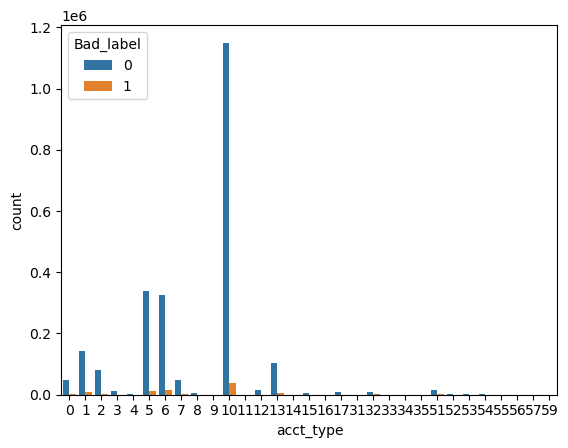

In [187]:
# Analysis the acct_type with target variable
sns.countplot(x='acct_type',hue='Bad_label',data=Data)

## Insight
* We can see in acct_type 10 maximum customers have good credit history.

<AxesSubplot:xlabel='owner_indic', ylabel='count'>

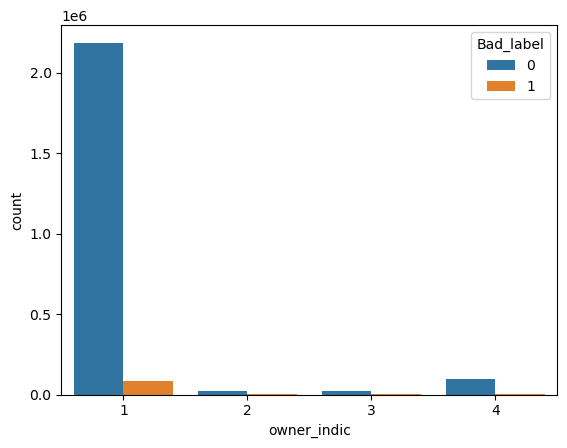

In [183]:
# Analysis the owner_indic with target variable
sns.countplot(x='owner_indic',hue='Bad_label',data=Data)

## Insight:
* We can see in owner_indic type 1 , maximum customers have good credit history.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Platinum Maxima'),
  Text(1, 0, 'Platinum Deligh'),
  Text(2, 0, 'Titanium Deligh'),
  Text(3, 0, 'RBL Bank Fun+'),
  Text(4, 0, 'Insignia'),
  Text(5, 0, 'Golf Card'),
  Text(6, 0, 'Platinum Cricke')])

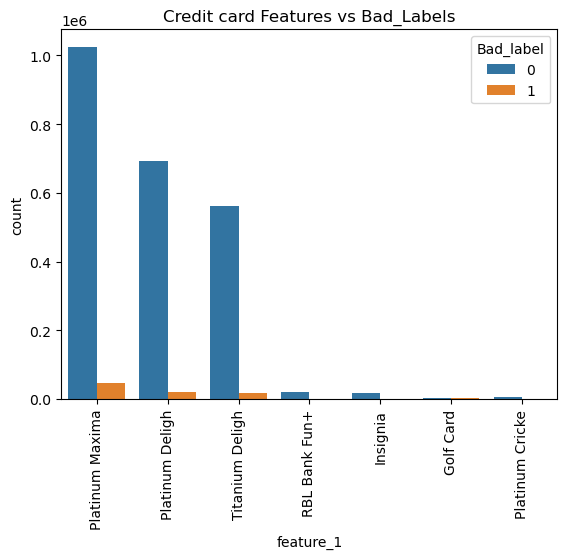

In [184]:
# Analysis the Feature_1 with target variable
sns.countplot(x='feature_1',hue='Bad_label',data=Data)
plt.title('Credit card Features vs Bad_Labels')
plt.xticks(rotation=90)

## Insight :
* We can see in feature_1, Platinum maxima has good credit history then platinum deligh and titanium deligh.

(600.0, 800.0)

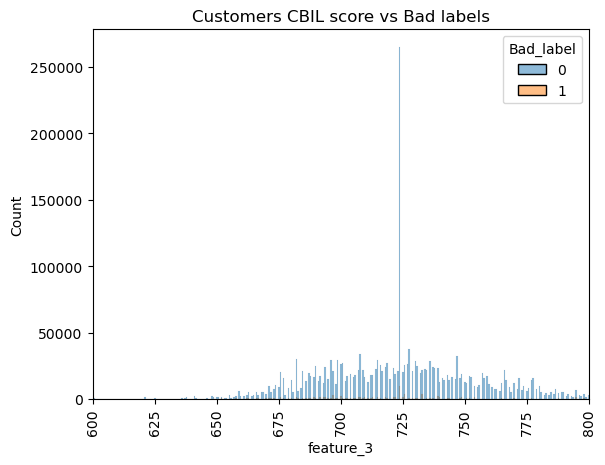

In [191]:
# Analysis the feature_3 with target variable
sns.histplot(x='feature_3',hue='Bad_label',data=Data)
plt.title('Customers CBIL score vs Bad labels')
plt.xticks(rotation=90)
plt.xlim(600, 800)

In [190]:
Data.feature_3.value_counts()

 724.0    275165
 728.0     37879
 708.0     35008
 747.0     32376
 682.0     31551
 715.0     30651
 696.0     30464
 730.0     29844
 699.0     29759
 736.0     29172
 726.0     28691
 700.0     28283
 701.0     27823
 719.0     27284
 727.0     26268
 716.0     25950
 731.0     25703
 690.0     25404
 733.0     25344
 694.0     25292
 718.0     25277
 739.0     25232
 737.0     24908
 721.0     24470
 697.0     24236
 738.0     23628
 714.0     23232
 707.0     23094
 734.0     23066
 709.0     22625
 735.0     22191
 729.0     21953
 725.0     21853
 676.0     21704
 685.0     21665
 766.0     21588
 717.0     21014
 723.0     20954
 749.0     20646
 687.0     20502
 732.0     20003
 757.0     19951
 722.0     19905
 704.0     19658
 713.0     19574
 712.0     18776
 706.0     18641
 743.0     18618
 692.0     18546
 703.0     18427
 689.0     18051
 710.0     17967
 752.0     17954
 688.0     17420
 759.0     17284
 748.0     17128
 705.0     17108
 753.0     16933
 745.0     167

## insight :
* We can see in feature_3,customers CBIL scores and maximum customers have good CBIL score they have good credit history.

<AxesSubplot:xlabel='feature_4', ylabel='count'>

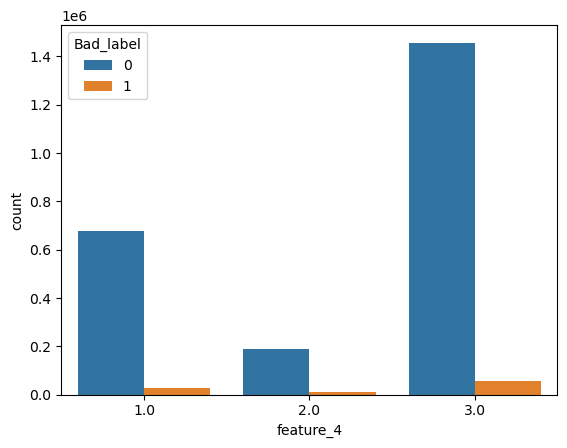

In [186]:
# Analysis the feature_4 with target varible
sns.countplot(x='feature_4',hue='Bad_label',data=Data)

## Insight :
* We can see in feature_4 type 3.0 customers have good credit history as compared to others.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MBA/MMS'),
  Text(1, 0, 'Post-Graduate'),
  Text(2, 0, 'Graduate'),
  Text(3, 0, 'Diploma'),
  Text(4, 0, 'Doctor'),
  Text(5, 0, 'Others'),
  Text(6, 0, 'Engineer'),
  Text(7, 0, 'Professional'),
  Text(8, 0, 'CA'),
  Text(9, 0, 'Architect')])

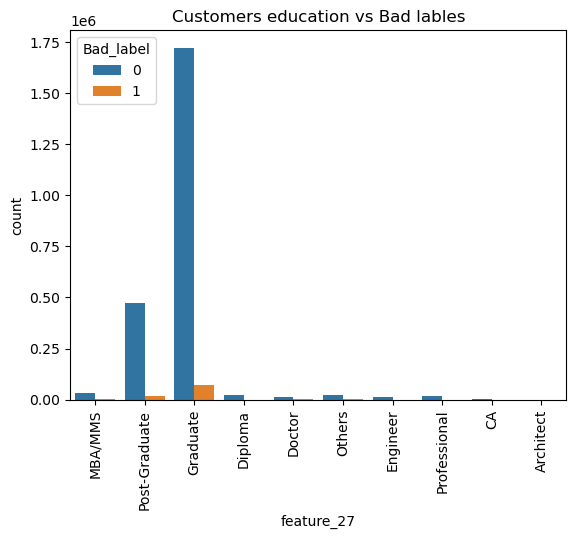

In [188]:
# Analysis the feature_27 with the target variable
sns.countplot(x='feature_27',hue='Bad_label',data=Data)
plt.title('Customers education vs Bad lables')
plt.xticks(rotation=90)

## Insight :
* We can see in feature_27 it shows customers education and who's customers have done their graduation they have good credit history.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Faridabad'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Ghaziabad'),
  Text(4, 0, 'Gurgaon'),
  Text(5, 0, 'Coimbatore'),
  Text(6, 0, 'Bengaluru'),
  Text(7, 0, 'Mumbai / Navi Mumbai / Thane'),
  Text(8, 0, 'Hyderabad / Secunderabad'),
  Text(9, 0, 'Noida / Greater Noida'),
  Text(10, 0, 'Kanchipuram'),
  Text(11, 0, 'Medak'),
  Text(12, 0, 'Pune'),
  Text(13, 0, 'Ahmedabad'),
  Text(14, 0, 'Nagpur'),
  Text(15, 0, 'Rangareddy'),
  Text(16, 0, 'Gautam Buddha Nagar'),
  Text(17, 0, 'Vadodara'),
  Text(18, 0, 'Kolkata / Howrah'),
  Text(19, 0, 'Kolhapur'),
  Text(20, 0, 'Tiruvallur'),
  Text(21, 0, 'Guntur'),
  Text(22, 0, 'Surat'),
  Text(23, 0, 'Bhavnagar'),
  Text(24, 0,

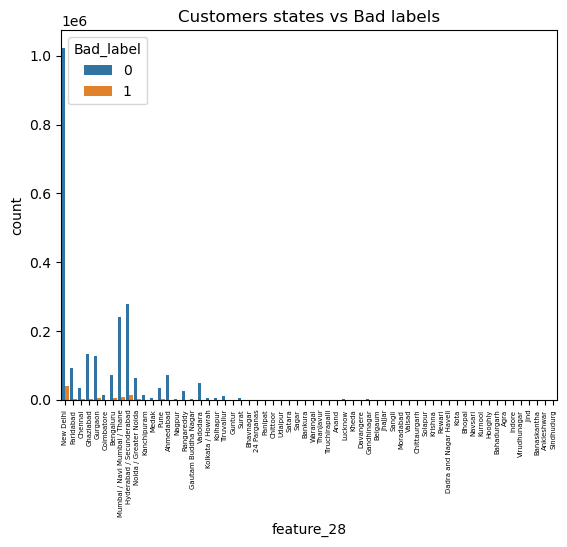

In [189]:
# Analysis the feature_28 with the target variable
sns.countplot(x='feature_28',hue='Bad_label',data=Data)
plt.title('Customers states vs Bad labels')
plt.xticks(rotation=90,fontsize=5)


## Insight :
* We can see in feature_28 there are customers states and most of customers belongs to new delhi and they have good credit history as compared to other states.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Paren'),
  Text(1, 0, 'Self'),
  Text(2, 0, 'Rente'),
  Text(3, 0, 'Compa'),
  Text(4, 0, 'PG/Ho')])

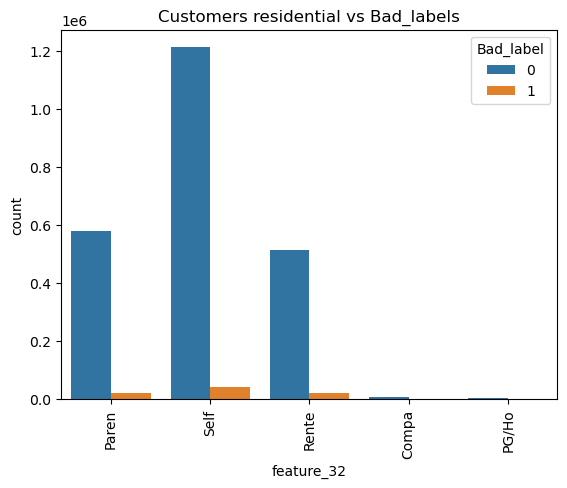

In [190]:
# Analysis the feature_32 with target variable
sns.countplot(x='feature_32',hue='Bad_label',data=Data)
plt.title('Customers residential vs Bad_labels')
plt.xticks(rotation=90)

## Insight:
* We can seen in feature_32, it shows customers residential house details and most of customers have their own house and they have good credit history,.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Private Ltd. Co.'),
  Text(1, 0, 'Proprietorship'),
  Text(2, 0, 'Public Ltd Co.'),
  Text(3, 0, 'MNC'),
  Text(4, 0, 'Government Organisation'),
  Text(5, 0, 'PSU'),
  Text(6, 0, 'Partnership Co.'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Partnership')])

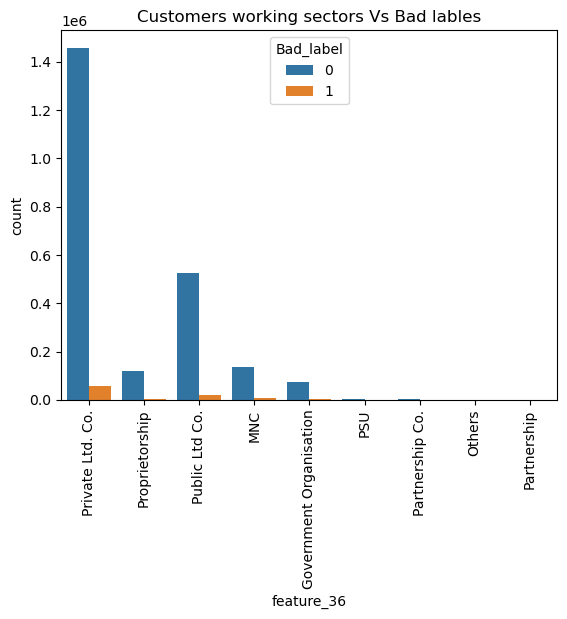

In [191]:
# Analysis the feature_36 with target variable
sns.countplot(x='feature_36',hue='Bad_label',data=Data)
plt.title('Customers working sectors Vs Bad lables')
plt.xticks(rotation=90)

## Insight :
* We can see in feature_36 it shows customers working sectors and most of customers are working in private Ltd.Co and they have good credit history.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Banking/Financial Services'),
  Text(2, 0, 'Health Care'),
  Text(3, 0, 'KPO/LPO/ITES'),
  Text(4, 0, 'Information Technology'),
  Text(5, 0, 'Industrial'),
  Text(6, 0, 'Transportation/Logistics'),
  Text(7, 0, 'Manufacturing'),
  Text(8, 0, 'Real Estate'),
  Text(9, 0, 'Tourism'),
  Text(10, 0, 'Agriculture')])

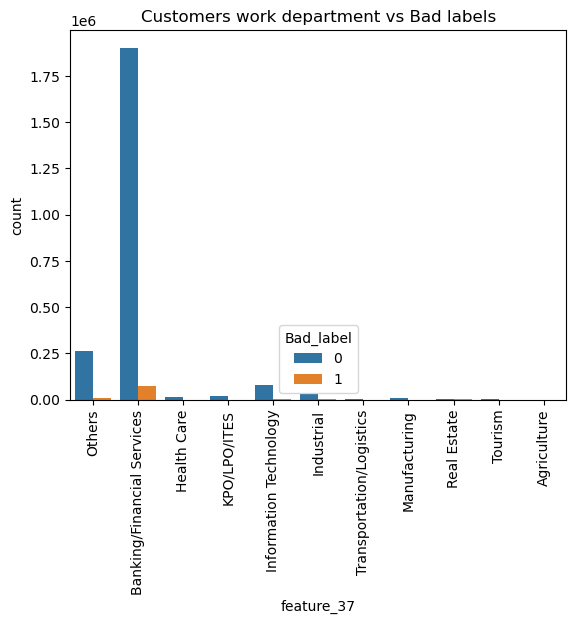

In [192]:
# Analysis the feature_37 with the target variable
sns.countplot(x='feature_37',hue='Bad_label',data=Data)
plt.title('Customers work department vs Bad labels')
plt.xticks(rotation=90)

## Insight:
* We can see in feature_37 it shows customers working department and most of customers are working in banking/finance services and they have good credit history.

Text(0.5, 1.0, 'customers payment behavior  vs Bad lables')

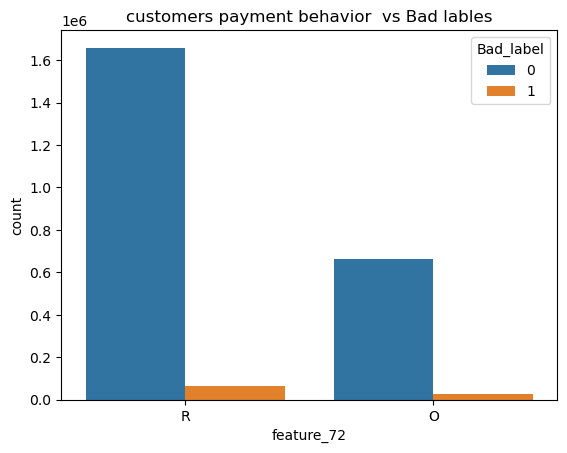

In [204]:
# Analysis the feature_72 with the target variable
sns.countplot(x='feature_72',hue='Bad_label',data=Data)
plt.title('customers payment behavior  vs Bad lables')

## Insight:
* We can see in feature_72 it shows customers payment behavior and most of customers have R type payment behavior and they have good credit history.

In [188]:
Data.head(5)

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0        12265          6            1          20900.0                0   
1        12265          6            1          20900.0                0   
2        12265          6            1          20900.0                0   
3        12265          6            1          20900.0                0   
7        12265          6            1          20900.0                0   

         feature_1  feature_3  feature_4  feature_7  feature_14  feature_26  \
0  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   
1  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   
2  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   
3  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   
7  Platinum Maxima      683.0        3.0    56000.0        12.0         0.0   

  feature_27 feature_28  feature_29  feature_30 feature_32  feature_34  \
0    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   
1    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   
2    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   
3    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   
7    MBA/MMS  New Delhi    110059.0      2006.0      Paren         1.0   

   feature_35        feature_36 feature_37 feature_38  feature_39  feature_40  \
0     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   
1     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   
2     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   
3     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   
7     35000.0  Private Ltd. Co.     Others     SR EXE      2009.0         1.0   

   feature_41 feature_43  feature_44 feature_50 feature_51  feature_52  \
0         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   
1         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   
2         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   
3         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   
7         4.0    Gurgaon    122001.0          N  HDFC Bank         0.0   

   feature_56  feature_64  feature_65  feature_66  feature_68  feature_69  \
0        10.0        10.0       157.0    110059.0         1.0     35000.0   
1        10.0        10.0       157.0    110059.0         1.0     35000.0   
2        10.0        10.0       157.0    110059.0         1.0     35000.0   
3        10.0        10.0       157.0    110059.0         1.0     35000.0   
7        10.0        10.0       157.0    110059.0         1.0     35000.0   

   feature_71 feature_72  Bad_label  enq_purpose   enq_amt  dt_opened_xyear  
0        13.0          R          1         10.0   10000.0             2015  
1        13.0          R          1         10.0   15000.0             2015  
2        13.0          R          1          5.0  300000.0             2015  
3        13.0          R          1          5.0  160000.0             2015  
7        13.0          R          1          5.0  350000.0             2015

# Convert catagorical data into numerical

In [189]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [190]:
Data.feature_1=lc.fit_transform(Data.feature_1)
Data.feature_27=lc.fit_transform(Data.feature_27)
Data.feature_28=lc.fit_transform(Data.feature_28)
Data.feature_32=lc.fit_transform(Data.feature_32)
Data.feature_36=lc.fit_transform(Data.feature_36)
Data.feature_37=lc.fit_transform(Data.feature_37)
Data.feature_38=lc.fit_transform(Data.feature_38)
Data.feature_43=lc.fit_transform(Data.feature_43)
Data.feature_50=lc.fit_transform(Data.feature_50)
Data.feature_51=lc.fit_transform(Data.feature_51)
Data.feature_72=lc.fit_transform(Data.feature_72)

In [191]:
Data.head(2)

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0        12265          6            1          20900.0                0   
1        12265          6            1          20900.0                0   

   feature_1  feature_3  feature_4  feature_7  feature_14  feature_26  \
0          4      683.0        3.0    56000.0        12.0         0.0   
1          4      683.0        3.0    56000.0        12.0         0.0   

   feature_27  feature_28  feature_29  feature_30  feature_32  feature_34  \
0           6          42    110059.0      2006.0           2         1.0   
1           6          42    110059.0      2006.0           2         1.0   

   feature_35  feature_36  feature_37  feature_38  feature_39  feature_40  \
0     35000.0           6           7        4509      2009.0         1.0   
1     35000.0           6           7        4509      2009.0         1.0   

   feature_41  feature_43  feature_44  feature_50  feature_51  feature_52  \
0         4.0          28    122001.0           0           3         0.0   
1         4.0          28    122001.0           0           3         0.0   

   feature_56  feature_64  feature_65  feature_66  feature_68  feature_69  \
0        10.0        10.0       157.0    110059.0         1.0     35000.0   
1        10.0        10.0       157.0    110059.0         1.0     35000.0   

   feature_71  feature_72  Bad_label  enq_purpose  enq_amt  dt_opened_xyear  
0        13.0           1          1         10.0  10000.0             2015  
1        13.0           1          1         10.0  15000.0             2015

## Changed the datatype into the integer

In [192]:
Data['customer_no']=Data['customer_no'].astype('int32')
Data['owner_indic']=Data['owner_indic'].astype('int32')
Data['high_credit_amt']=Data['high_credit_amt'].astype('int32')
Data['cur_balance_amt']=Data['cur_balance_amt'].astype('int32')
Data['feature_1']=Data['feature_1'].astype('int32')
Data['feature_3']=Data['feature_3'].astype('int32')
Data['feature_4']=Data['feature_4'].astype('int32')
Data['feature_7']=Data['feature_7'].astype('int32')
Data['feature_14']=Data['feature_14'].astype('int32')
Data['feature_26']=Data['feature_26'].astype('int32')
Data['feature_27']=Data['feature_27'].astype('int32')
Data['feature_28']=Data['feature_28'].astype('int8')
Data['feature_29']=Data['feature_29'].astype('int32')
Data['feature_30']=Data['feature_30'].astype('int32')
Data['feature_32']=Data['feature_32'].astype('int32')
Data['feature_34']=Data['feature_34'].astype('int32')
Data['feature_35']=Data['feature_35'].astype('int32')
Data['feature_36']=Data['feature_36'].astype('int32')
Data['feature_37']=Data['feature_37'].astype('int32')
Data['feature_38']=Data['feature_38'].astype('int32')
Data['feature_39']=Data['feature_39'].astype('int32')
Data['feature_40']=Data['feature_40'].astype('int32')
Data['feature_41']=Data['feature_41'].astype('int32')
Data['feature_43']=Data['feature_43'].astype('int32')
Data['feature_44']=Data['feature_44'].astype('int32')
Data['feature_50']=Data['feature_50'].astype('int32')
Data['feature_51']=Data['feature_51'].astype('int32')
Data['feature_52']=Data['feature_52'].astype('int32')
Data['feature_56']=Data['feature_56'].astype('int32')
Data['feature_64']=Data['feature_64'].astype('int32')
Data['feature_65']=Data['feature_65'].astype('int32')
Data['feature_66']=Data['feature_66'].astype('int32')
Data['feature_68']=Data['feature_68'].astype('int32')
Data['feature_69']=Data['feature_69'].astype('int32')
Data['feature_71']=Data['feature_71'].astype('int32')
Data['feature_72']=Data['feature_72'].astype('int32')
Data['Bad_label']=Data['Bad_label'].astype('int32')
Data['enq_purpose']=Data['enq_purpose'].astype('int32')
Data['enq_amt'] = Data['enq_amt'].astype('int32')
Data['dt_opened_xyear']=Data['dt_opened_xyear'].astype('int32') 

In [193]:
# checked the datatype
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412839 entries, 0 to 4961775
Data columns (total 41 columns):
 #   Column           Dtype
---  ------           -----
 0   customer_no      int32
 1   acct_type        int64
 2   owner_indic      int32
 3   high_credit_amt  int32
 4   cur_balance_amt  int32
 5   feature_1        int32
 6   feature_3        int32
 7   feature_4        int32
 8   feature_7        int32
 9   feature_14       int32
 10  feature_26       int32
 11  feature_27       int32
 12  feature_28       int8 
 13  feature_29       int32
 14  feature_30       int32
 15  feature_32       int32
 16  feature_34       int32
 17  feature_35       int32
 18  feature_36       int32
 19  feature_37       int32
 20  feature_38       int32
 21  feature_39       int32
 22  feature_40       int32
 23  feature_41       int32
 24  feature_43       int32
 25  feature_44       int32
 26  feature_50       int32
 27  feature_51       int32
 28  feature_52       int32
 29  feature_56    

# Feature selection

In [194]:
# checked the correlation between the variables
Data.corr()

customer_no  acct_type  owner_indic  high_credit_amt  \
customer_no         1.000000   0.008654    -0.009459        -0.017144   
acct_type           0.008654   1.000000    -0.049806        -0.025982   
owner_indic        -0.009459  -0.049806     1.000000         0.242719   
high_credit_amt    -0.017144  -0.025982     0.242719         1.000000   
cur_balance_amt    -0.007845  -0.056976     0.199753         0.741175   
feature_1          -0.756623  -0.000931    -0.017774        -0.025000   
feature_3           0.051560  -0.039636     0.058115         0.026702   
feature_4          -0.218050   0.004831    -0.013032         0.009260   
feature_7          -0.008732  -0.009671     0.012100         0.015654   
feature_14          0.378539  -0.001934    -0.018843        -0.015192   
feature_26         -0.311635  -0.015666    -0.002662         0.011630   
feature_27          0.018832  -0.016915     0.002312        -0.000701   
feature_28          0.088608  -0.005202     0.008264        -0.000600   
feature_29         -0.219812   0.004600     0.000983         0.002375   
feature_30         -0.048845  -0.008507    -0.007684        -0.021341   
feature_32         -0.169836  -0.005177     0.009058         0.020394   
feature_34          0.008303   0.042518     0.078851         0.046553   
feature_35         -0.103621   0.002893     0.031122         0.034967   
feature_36          0.030043   0.004065    -0.000738         0.003401   
feature_37          0.142126  -0.012389    -0.021719        -0.009271   
feature_38         -0.007755  -0.002818    -0.007359        -0.002177   
feature_39         -0.009184  -0.042388    -0.078145        -0.044241   
feature_40         -0.015585  -0.022490    -0.045948        -0.031356   
feature_41         -0.026799  -0.045298    -0.057849        -0.030238   
feature_43          0.071155  -0.006432     0.028330         0.009222   
feature_44         -0.219389   0.005267    -0.000718         0.001996   
feature_50         -0.075762   0.031501    -0.011607         0.002947   
feature_51         -0.000526   0.003230    -0.010332         0.010868   
feature_52         -0.046812   0.024137     0.023877         0.029038   
feature_56          0.033390  -0.000961     0.022483         0.023120   
feature_64          0.047124  -0.001458     0.012668         0.017305   
feature_65          0.046001  -0.003053    -0.017393        -0.018801   
feature_66         -0.162193   0.004440    -0.015206        -0.004521   
feature_68          0.008303   0.042518     0.078851         0.046553   
feature_69         -0.103621   0.002893     0.031122         0.034967   
feature_71          0.045537   0.002375     0.012450         0.020304   
feature_72         -0.020019  -0.005159     0.017510        -0.007556   
Bad_label          -0.007050  -0.003342     0.005005         0.037024   
enq_purpose        -0.007325   0.055656     0.011909         0.014022   
enq_amt            -0.012163   0.005000     0.019532         0.066593   
dt_opened_xyear          NaN        NaN          NaN              NaN   

                 cur_balance_amt  feature_1  feature_3  feature_4  feature_7  \
customer_no            -0.007845  -0.756623   0.051560  -0.218050  -0.008732   
acct_type              -0.056976  -0.000931  -0.039636   0.004831  -0.009671   
owner_indic             0.199753  -0.017774   0.058115  -0.013032   0.012100   
high_credit_amt         0.741175  -0.025000   0.026702   0.009260   0.015654   
cur_balance_amt         1.000000  -0.018738   0.017741   0.007248   0.001579   
feature_1              -0.018738   1.000000  -0.031120   0.095183  -0.105894   
feature_3               0.017741  -0.031120   1.000000  -0.244180   0.301248   
feature_4               0.007248   0.095183  -0.244180   1.000000  -0.065121   
feature_7               0.001579  -0.105894   0.301248  -0.065121   1.000000   
feature_14             -0.008380  -0.424154   0.043838   0.075157  -0.026006   
feature_26              0.006456   0.108714   0.020988   0.228284   0.

<AxesSubplot:>

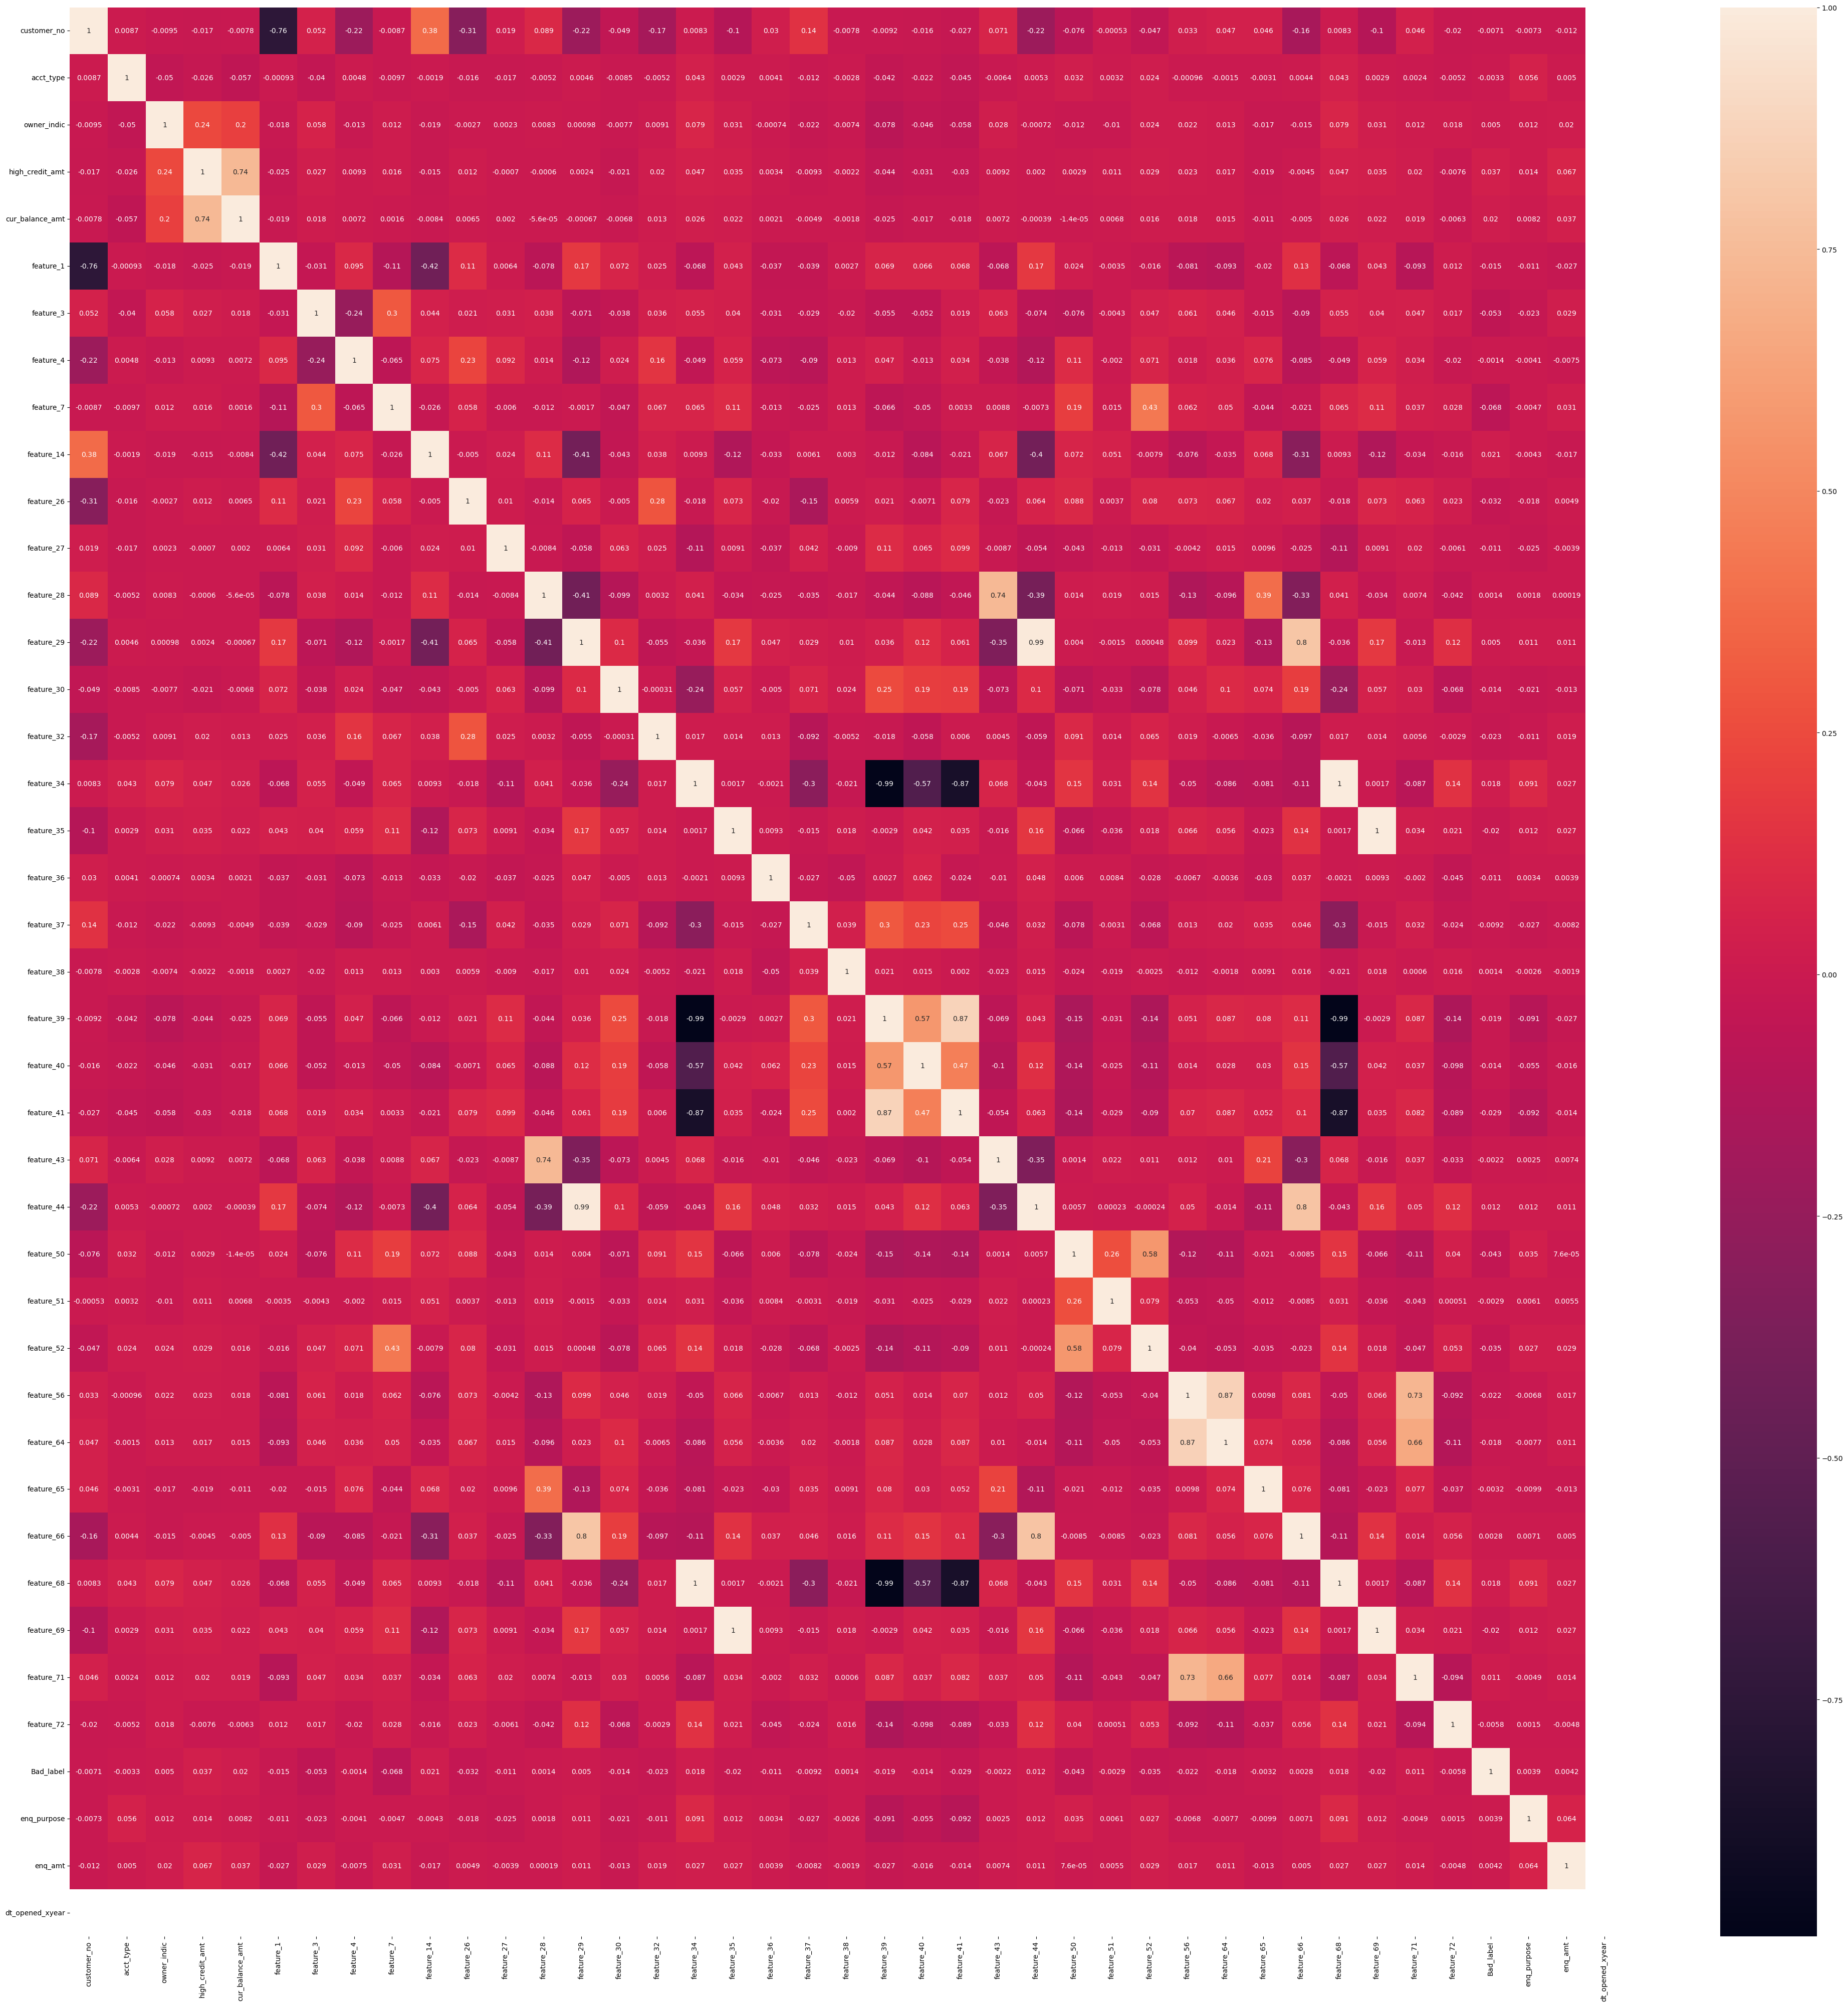

In [195]:
# checked the heatmap 
plt.figure(figsize=(50,50))
sns.heatmap(Data.corr(),annot=True)

In [196]:
# feature_35  high correlate with feature_69
Data.drop('feature_35',axis=1,inplace=True)

In [197]:
# Feature_29 high correlate with feature_44
Data.drop('feature_29',axis=1,inplace=True)

In [198]:
# feature_34 high correlate with feature_68
Data.drop('feature_34',axis=1,inplace=True)

In [199]:
# Constant feature
Data.drop('dt_opened_xyear',axis=1,inplace=True)

# Scalling the dataset

In [202]:
## s caling the features using the minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler() 

In [203]:
Data[['customer_no','high_credit_amt','feature_3','feature_7','feature_28','feature_30','feature_38','feature_39','feature_43','feature_44','feature_65','feature_66','feature_69','enq_amt']]=scale.fit_transform(Data[['customer_no','high_credit_amt','feature_3','feature_7','feature_28','feature_30','feature_38','feature_39','feature_43','feature_44','feature_65','feature_66','feature_69','enq_amt']])

In [204]:
Data.head()

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0     0.513245          6            1         0.000116                0   
1     0.513245          6            1         0.000116                0   
2     0.513245          6            1         0.000116                0   
3     0.513245          6            1         0.000116                0   
7     0.513245          6            1         0.000116                0   

   feature_1  feature_3  feature_4  feature_7  feature_14  feature_26  \
0          4   0.762542          3   0.046015          12           0   
1          4   0.762542          3   0.046015          12           0   
2          4   0.762542          3   0.046015          12           0   
3          4   0.762542          3   0.046015          12           0   
7          4   0.762542          3   0.046015          12           0   

   feature_27  feature_28  feature_30  feature_32  feature_36  feature_37  \
0           6    0.688525    0.823529           2           6           7   
1           6    0.688525    0.823529           2           6           7   
2           6    0.688525    0.823529           2           6           7   
3           6    0.688525    0.823529           2           6           7   
7           6    0.688525    0.823529           2           6           7   

   feature_38  feature_39  feature_40  feature_41  feature_43  feature_44  \
0    0.796362    0.997022           1           4    0.405797    0.171301   
1    0.796362    0.997022           1           4    0.405797    0.171301   
2    0.796362    0.997022           1           4    0.405797    0.171301   
3    0.796362    0.997022           1           4    0.405797    0.171301   
7    0.796362    0.997022           1           4    0.405797    0.171301   

   feature_50  feature_51  feature_52  feature_56  feature_64  feature_65  \
0           0           3           0          10          10    0.015589   
1           0           3           0          10          10    0.015589   
2           0           3           0          10          10    0.015589   
3           0           3           0          10          10    0.015589   
7           0           3           0          10          10    0.015589   

   feature_66  feature_68  feature_69  feature_71  feature_72  Bad_label  \
0    0.000076           1    0.002333          13           1          1   
1    0.000076           1    0.002333          13           1          1   
2    0.000076           1    0.002333          13           1          1   
3    0.000076           1    0.002333          13           1          1   
7    0.000076           1    0.002333          13           1          1   

   enq_purpose   enq_amt  
0           10  0.000010  
1           10  0.000015  
2            5  0.000300  
3            5  0.000160  
7            5  0.000350

In [205]:
# Create the independent variable and dependent variable
x = Data.drop("Bad_label",axis=1)  # Independent variable


In [206]:
x.head()

customer_no  acct_type  owner_indic  high_credit_amt  cur_balance_amt  \
0     0.513245          6            1         0.000116                0   
1     0.513245          6            1         0.000116                0   
2     0.513245          6            1         0.000116                0   
3     0.513245          6            1         0.000116                0   
7     0.513245          6            1         0.000116                0   

   feature_1  feature_3  feature_4  feature_7  feature_14  feature_26  \
0          4   0.762542          3   0.046015          12           0   
1          4   0.762542          3   0.046015          12           0   
2          4   0.762542          3   0.046015          12           0   
3          4   0.762542          3   0.046015          12           0   
7          4   0.762542          3   0.046015          12           0   

   feature_27  feature_28  feature_30  feature_32  feature_36  feature_37  \
0           6    0.688525    0.823529           2           6           7   
1           6    0.688525    0.823529           2           6           7   
2           6    0.688525    0.823529           2           6           7   
3           6    0.688525    0.823529           2           6           7   
7           6    0.688525    0.823529           2           6           7   

   feature_38  feature_39  feature_40  feature_41  feature_43  feature_44  \
0    0.796362    0.997022           1           4    0.405797    0.171301   
1    0.796362    0.997022           1           4    0.405797    0.171301   
2    0.796362    0.997022           1           4    0.405797    0.171301   
3    0.796362    0.997022           1           4    0.405797    0.171301   
7    0.796362    0.997022           1           4    0.405797    0.171301   

   feature_50  feature_51  feature_52  feature_56  feature_64  feature_65  \
0           0           3           0          10          10    0.015589   
1           0           3           0          10          10    0.015589   
2           0           3           0          10          10    0.015589   
3           0           3           0          10          10    0.015589   
7           0           3           0          10          10    0.015589   

   feature_66  feature_68  feature_69  feature_71  feature_72  enq_purpose  \
0    0.000076           1    0.002333          13           1           10   
1    0.000076           1    0.002333          13           1           10   
2    0.000076           1    0.002333          13           1            5   
3    0.000076           1    0.002333          13           1            5   
7    0.000076           1    0.002333          13           1            5   

    enq_amt  
0  0.000010  
1  0.000015  
2  0.000300  
3  0.000160  
7  0.000350

In [207]:
y = Data.Bad_label  # dependent variable
y.head()

0    1
1    1
2    1
3    1
7    1
Name: Bad_label, dtype: int32

# Model creation

In [208]:
# spliting the data into testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

## Balanced the data


In [209]:
Data.Bad_label.value_counts()

0    2322734
1      90105
Name: Bad_label, dtype: int64

In [210]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [212]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [213]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 1858289, 1: 71982})
Counter({0: 1858289, 1: 1858289})


# Model selection

# Logistic Regression 

In [214]:
#importing the model library
from sklearn.linear_model import LogisticRegression 
lrc=LogisticRegression()   # #object creation
lrc.fit(x_sm,y_sm)    # training the model

LogisticRegression()

In [215]:
y_pred=lrc.predict(x_test)   # prediction

# Model Evaluation

In [216]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score


In [217]:
# checked the accurancy
acc1=accuracy_score(y_test,y_pred)
acc1

0.5523387377530213

In [218]:
f1_1=f1_score(y_pred,y_test,average="weighted")
f1_1

0.42436001545296803

In [219]:
# checked the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.55      0.70    464445
           1       0.05      0.57      0.09     18123

    accuracy                           0.55    482568
   macro avg       0.51      0.56      0.40    482568
weighted avg       0.94      0.55      0.68    482568



# Decision tree classification

In [220]:
from sklearn.tree import DecisionTreeClassifier   #importing decision tree from sklearn.tree
dc=DecisionTreeClassifier()   # create the object
dc.fit(x_sm,y_sm)            # fit the model

DecisionTreeClassifier()

In [221]:
y_pred_dc=dc.predict(x_test)            #prediction
y_pred_dc                        #predicted values 

array([0, 0, 0, ..., 0, 0, 0])

In [222]:
# Checked the accuracy
acc2=accuracy_score(y_test,y_pred_dc)
acc2

0.999929543608362

In [223]:
f1_2=f1_score(y_pred_dc,y_test,average="weighted")
f1_2

0.9999295268051578

In [224]:
# checked the classification report
print(classification_report(y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    464445
           1       1.00      1.00      1.00     18123

    accuracy                           1.00    482568
   macro avg       1.00      1.00      1.00    482568
weighted avg       1.00      1.00      1.00    482568



# XGB Classifier

In [225]:
#importing the model library
from xgboost import XGBClassifier
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(x_sm,y_sm)     # training the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [226]:
y_pred_xgb=xgb_r.predict(x_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [227]:
# Checked the accuracy
acc3=accuracy_score(y_test,y_pred_xgb)
acc3

0.9787594701679349

In [228]:
f1_3=f1_score(y_pred_xgb,y_test,average='weighted')
f1_3

0.9772333415621773

In [229]:
# checked the classification report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    464445
           1       0.66      0.89      0.76     18123

    accuracy                           0.98    482568
   macro avg       0.83      0.94      0.87    482568
weighted avg       0.98      0.98      0.98    482568



# ANN -MLPClassifier

In [230]:
#importing the model library
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(50,3),
                   learning_rate_init=0.1,
                   max_iter=100,
                   random_state=2)     
model.fit(x_train,y_train)    # training the model

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100,
              random_state=2)

In [231]:
y_pred_ann=model.predict(x_test)    # Prediction
y_pred_ann

array([0, 0, 0, ..., 0, 0, 0])

In [232]:
# checked the accuracy
acc_4=accuracy_score(y_test,y_pred_ann)
acc_4

0.962444671010096

In [233]:
# checked the f1 score
f1_4=f1_score(y_pred_ann,y_test,average='weighted')
f1_4

0.980862987097326

In [234]:
# checked the classification report
print(classification_report(y_test,y_pred_ann))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    464445
           1       0.00      0.00      0.00     18123

    accuracy                           0.96    482568
   macro avg       0.48      0.50      0.49    482568
weighted avg       0.93      0.96      0.94    482568



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classification

In [235]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_sm,y_sm)

RandomForestClassifier()

In [236]:
y_pred_rfc=rfc.predict(x_test)  # # test data prediction
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

In [237]:
# checked the accuracy score
acc_5=accuracy_score(y_test,y_pred_rfc)
acc_5

0.9999917110127484

In [238]:
# checked the f1 score
f1_5=f1_score(y_pred_rfc,y_test,average='weighted')
f1_5

0.9999917114523258

In [239]:
#checked the classification report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    464445
           1       1.00      1.00      1.00     18123

    accuracy                           1.00    482568
   macro avg       1.00      1.00      1.00    482568
weighted avg       1.00      1.00      1.00    482568



## Model comparison dataframe

In [240]:
#Create the list of Dictionary 
new_data=[['Logistic_Regression_cl',acc1,f1_1,],['DecisionTreeClassifier ',acc2,f1_2],[' XGBClassifier',acc3,f1_3],['ANN -MLPClassifier',acc_4,f1_4],['RandomForestClassifier',acc_5,f1_5]]
          

In [241]:
# Create the dataframe using Pd.datafram
Model_dataframe=pd.DataFrame(new_data,columns=['Model',"Accuracy_score","F1_score"])

In [242]:
## Excute the frame with model score.
Model_dataframe

Model  Accuracy_score  F1_score
0   Logistic_Regression_cl        0.552339  0.424360
1  DecisionTreeClassifier         0.999930  0.999930
2            XGBClassifier        0.978759  0.977233
3       ANN -MLPClassifier        0.962445  0.980863
4   RandomForestClassifier        0.999992  0.999992

## Data Analysis Report

## Challenges faced during the Project

## Conclusion of project